**Projet 9**: Produisez une étude de marché

notebook_1: la préparation, le nettoyage et l’analyse exploratoire des données

**notebook_2**: le/les clusterings effectués et les différentes visualisations associées

tester la classification ascendante hiérarchique, avec un dendrogramme comme visualisation

utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering

analyser les centroïdes des classes

réaliser une ACP (analyse des composants principales) afin de visualiser les résultats de l'analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...
  

[Préparation des données ](/#scrollTo=a9H4sJGgohNh&line=1&uniqifier=1)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Préparation des données**

In [2]:
working_directory= '/content/gdrive/MyDrive/Colab Notebooks/OC_projet09'

In [3]:
#importation des librairies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as csh

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



In [4]:
#importation des données
data_volaille= pd.read_csv(os.path.join(working_directory, 'data_volaille.csv'), index_col = 1)
pd.set_option('display.max_columns', None)
data_volaille=data_volaille.drop(columns='Unnamed: 0')
display(data_volaille)
data_volaille.shape

Population, milles personnes  \
Zone                                                                   
Afghanistan                                                36296.113   
Afrique du Sud                                             57009.756   
Albanie                                                     2884.169   
Algérie                                                    41389.189   
Allemagne                                                  82658.409   
...                                                              ...   
Venezuela (République bolivarienne du)                     29402.484   
Viet Nam                                                   94600.648   
Yémen                                                      27834.819   
Zambie                                                     16853.599   
Zimbabwe                                                   14236.595   

                                        Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)  \
Zone                                                                                                              
Afghanistan                                                                           5.0                         
Afrique du Sud                                                                      143.0                         
Albanie                                                                              85.0                         
Algérie                                                                              22.0                         
Allemagne                                                                            71.0                         
...                                                                                   ...                         
Venezuela (République bolivarienne du)                                               71.0                         
Viet Nam                                                                             48.0                         
Yémen                                                                                30.0                         
Zambie                                                                               11.0                         
Zimbabwe                                                                             16.0                         

                                        Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)  \
Zone                                                                                                                       
Afghanistan                                                                          1.53                                  
Afrique du Sud                                                                      35.69                                  
Albanie                                                                             16.36                                  
Algérie                                                                              6.38                                  
Allemagne                                                                           19.47                                  
...                                                                                   ...                                  
Venezuela (République bolivarienne du)                                              20.28                                  
Viet Nam                                                                            12.33                                  
Yémen                                                                                8.53                                  
Zambie                                                                               3.42                                  
Zimbabwe                                                                             4.68                              

(237, 21)

In [5]:
#regroupement des colonnes pour faciliter l'analyse
data_volaille=data_volaille[['Population, milles personnes', 'Muslims_%','distance, km',
       'Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)',
       'Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)',
       'Disponibilité de matière grasse de la viande de volaille en quantité (g/personne/jour)',
       'Disponibilité de protéines de la viande de volaille en quantité (g/personne/jour)',
       'Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       'Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)',
       'PIB par habitant, ($ PPA internationaux constants de 2017)',
       'Croissance de PBI', 'Dette ext % du PIB','Chomage_2017',
        'Cost of a healthy diet (PPP dollar per person per day)',
       'Cost of animal source foods',
       'Percentage of the population unable to afford a healthy diet (percent)',
       'Densité du réseau ferroviaire (pour 100 km carrés de surface totale du pays)',
       'Stabilité politique et absence de violence/terrorisme (indice)',

       'taux_dependance_import(%)', 'autosuffisance_prod(%)']]

In [6]:
data_columns=data_volaille.columns
print(data_columns)

Index(['Population, milles personnes', 'Muslims_%', 'distance, km',
       'Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)',
       'Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)',
       'Disponibilité de matière grasse de la viande de volaille en quantité (g/personne/jour)',
       'Disponibilité de protéines de la viande de volaille en quantité (g/personne/jour)',
       'Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       'Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)',
       'PIB par habitant, ($ PPA internationaux constants de 2017)',
       'Croissance de PBI', 'Dette ext % du PIB', 'Chomage_2017',
       'Cost of a healthy diet (PPP dollar per person per day)',
       'Cost of animal source foods',
       'Percentage of the population unable to afford a hea

# **Clustering par ACH (la dendrogramme)**

### **Centrage - réduction des données (scaling)**


Au préalable, il est nécessaire de centrer-réduire les données. C’est à dire, recalculer chaque valeur de manière à ce que la moyenne de la variable soit égale à 0 et la variance et l’écart-type égale à 1. Pour une variable donnée, on soustrait à chaque valeur la moyenne de la variable, puis on divise le tout par l’écart-type.

In [7]:
#extraire des valeurs numériques ainsi que des noms des pays et des colonnes de dataset
X = data_volaille.values
names = data_volaille.index
features = data_volaille.columns

In [8]:
#Centrage et Réduction
scaler = StandardScaler()

In [9]:
scaler.fit(X)

StandardScaler()

In [10]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 3.38414640e-02,  2.17899968e+00,  1.22551695e-01,
        -1.35036016e+00, -1.38559826e+00, -1.28104475e+00,
        -1.38192955e+00, -1.46591597e+00, -1.29011182e+00,
        -1.02463669e+00, -9.56945872e-01, -3.66143821e-16,
        -2.76779057e-01,  7.14153718e-01,  8.19366131e-16,
        -6.15171821e-16,  0.00000000e+00, -2.69149696e-16,
        -3.02745077e+00,  1.05329901e-01, -6.88412086e-01],
       [ 1.91535940e-01, -5.97699674e-01,  1.05353926e+00,
         1.33148814e+00,  1.14981364e+00,  1.22387424e+00,
         1.46898932e+00, -5.34538444e-02, -5.55848869e-02,
        -8.95661442e-02, -3.51033977e-01, -5.75182426e-01,
        -2.72586046e-01,  3.26961664e+00,  1.50206835e+00,
         1.03222794e+00,  1.05674643e+00, -5.76565136e-01,
        -2.40808466e-01, -4.98772593e-01,  2.62661386e-02],
       [-2.20526104e-01,  1.69572245e+00, -1.07331433e+00,
         2.04334509e-01, -2.84891046e-01,  4.37576798e-01,
        -1.80215777e-01,  1.37595783e+00,  1.81303997e

In [11]:
data_volaille_scaled= pd.DataFrame(X_scaled, index=names, columns=features)

In [12]:
#X_scaled = scaler.fit_transform(X)

In [13]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
mean -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       14   15   16   17   18   19   20  
mean  0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0

### **Dendrogramme avec des données scalées**

Nous pouvons procéder à la classification ascendante hiérarchique selon la méthode de Ward. L’objectif est de regrouper des pays similaires.

In [14]:
Z_scaled = linkage(X_scaled, method="ward")

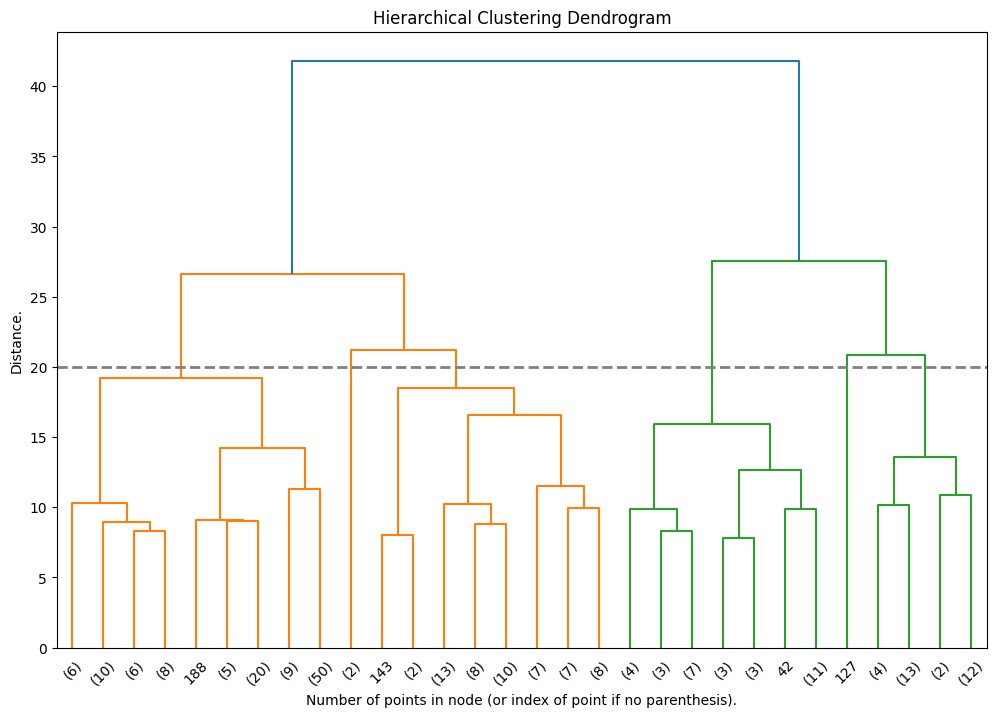

In [15]:
#Affichage du dendrogramme en mode vertical
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z_scaled, truncate_mode="lastp", ax=ax)
plt.axhline(y=20, c='grey', lw=2, linestyle='dashed')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

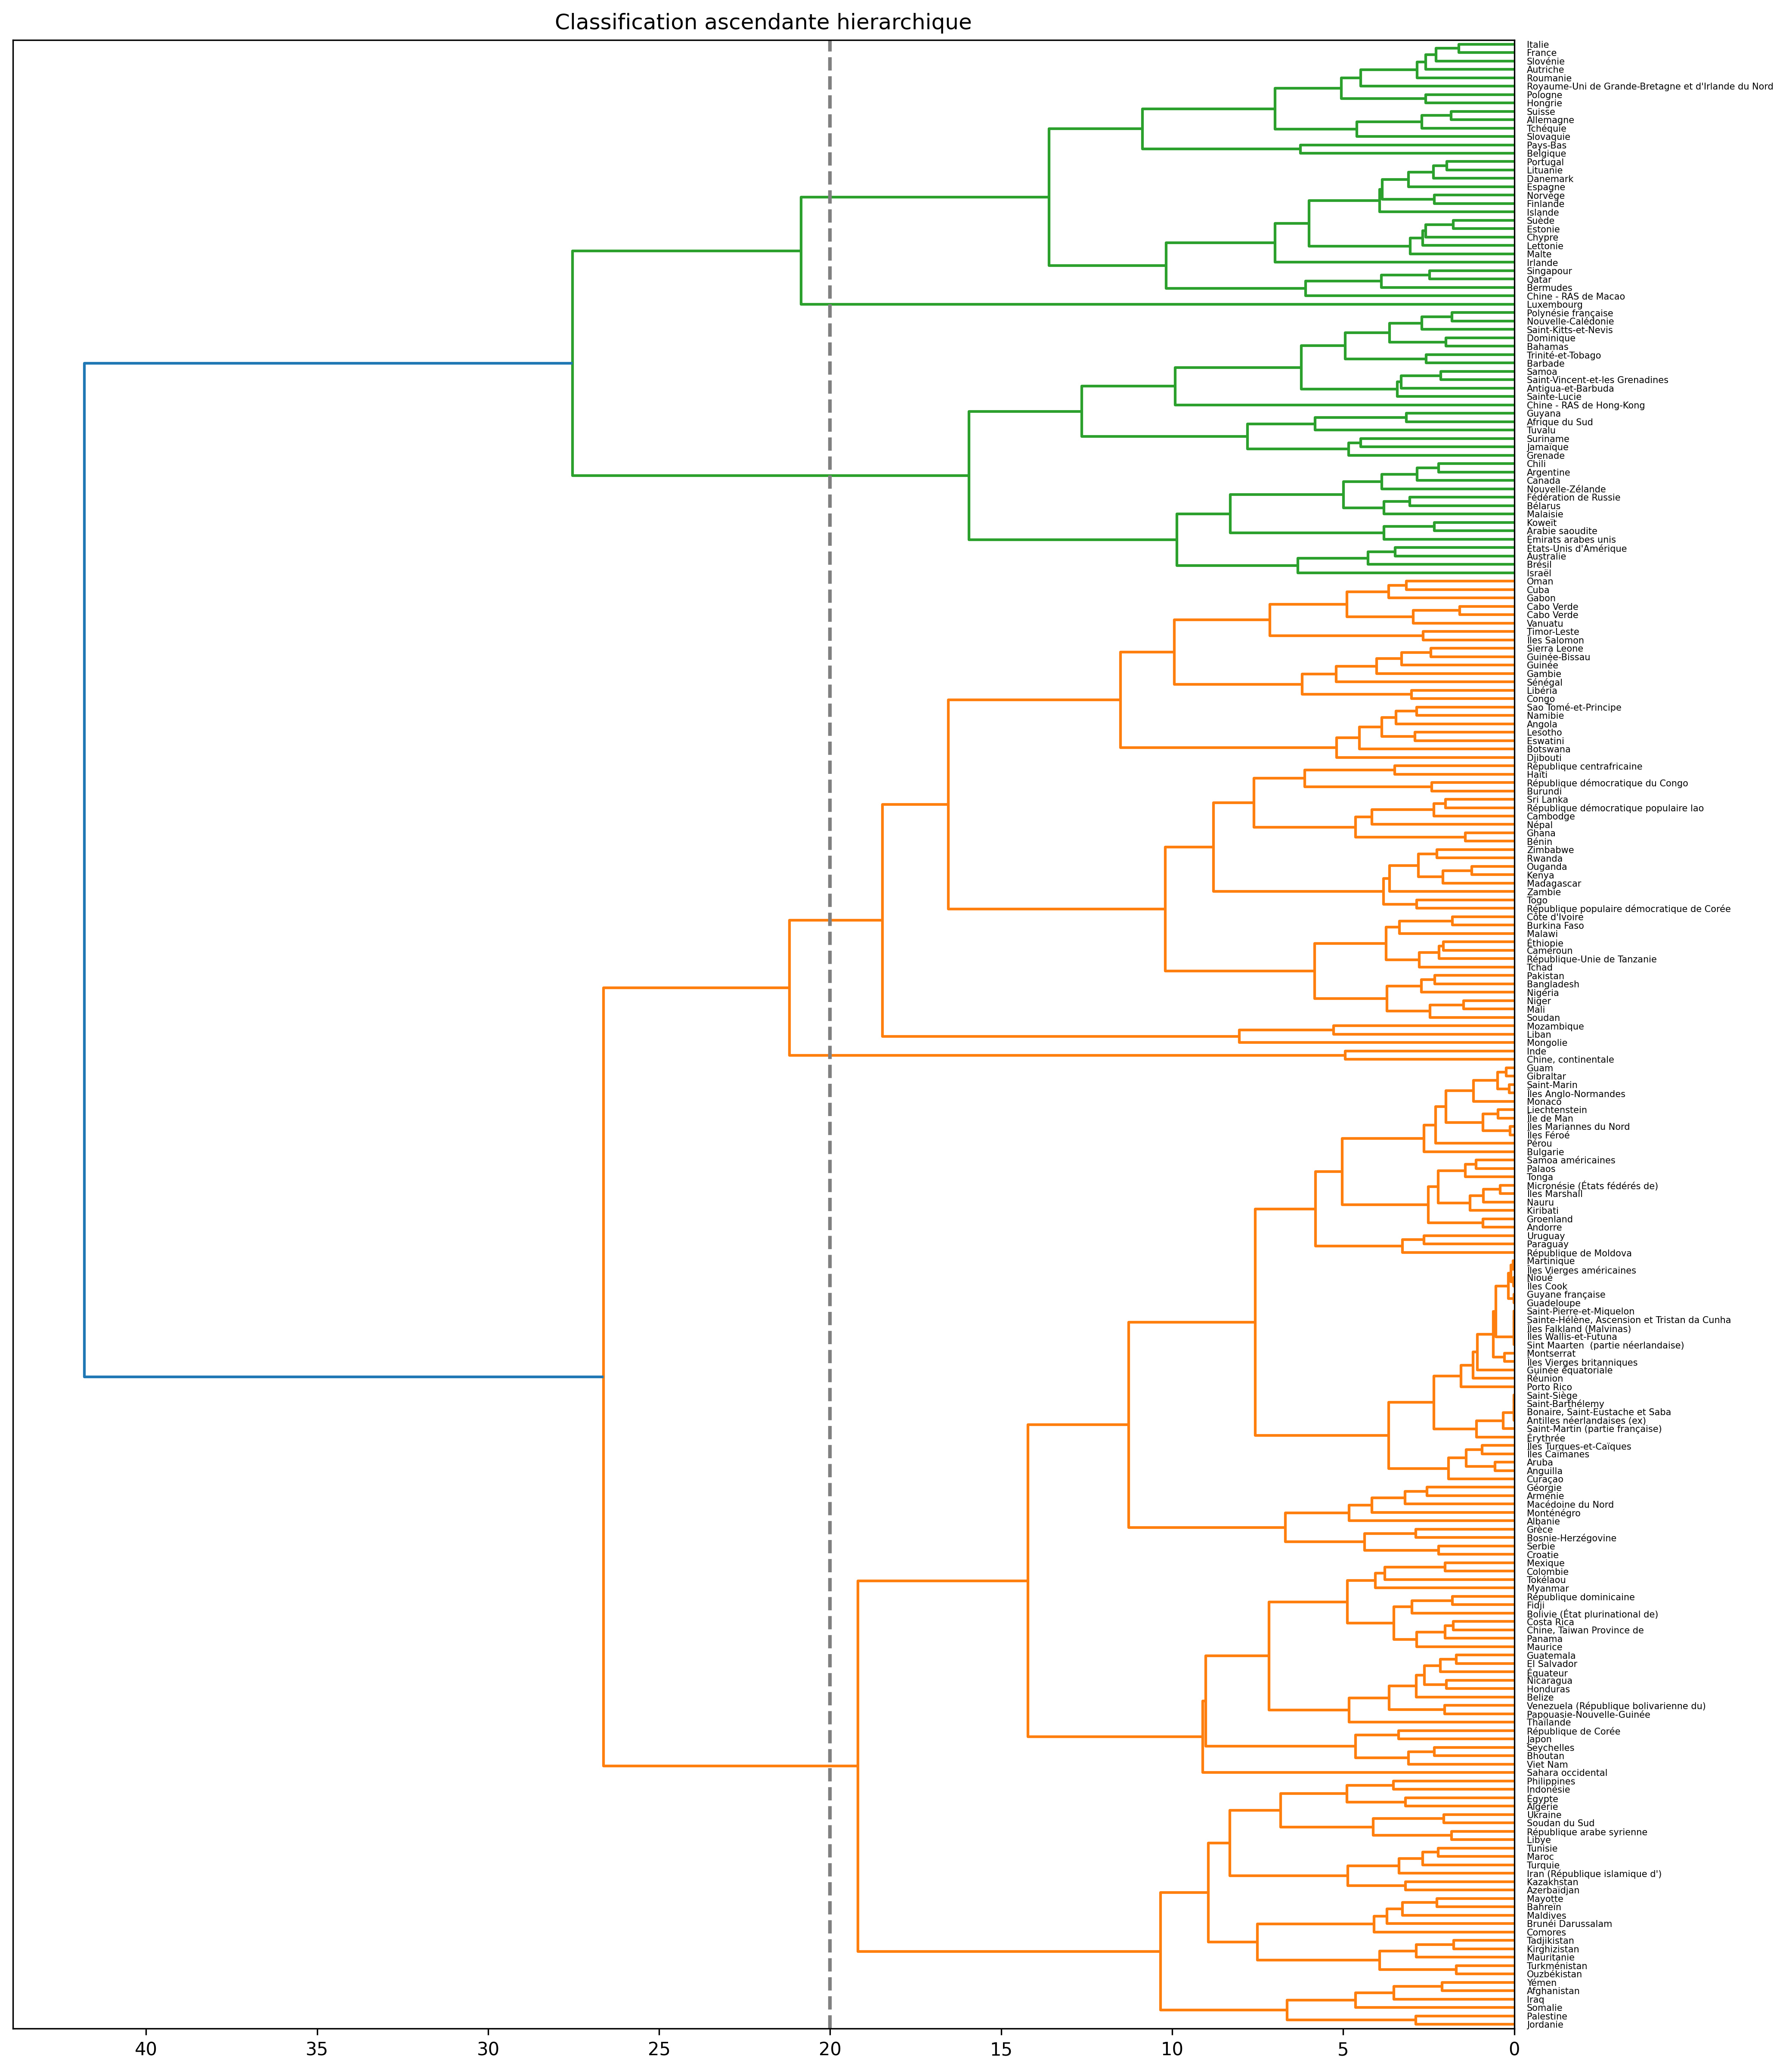

In [16]:
#Affichage du dendrogramme en mode horisontale
fig = plt.figure(figsize=(15,20))
fig.set_dpi(300)

dendrogram(Z_scaled, orientation="left", labels=data_volaille.index)
plt.axvline(x=20, c='grey', lw=2, linestyle='dashed')
plt.title('Classification ascendante hierarchique')
plt.show()

Une fois le dendrogramme obtenu, nous pouvons choisir en combien de clusters nous pouvons diviser notre arbre. Ici, une partition en 6 clusters permet d’avoir des groupes de taille raisonnable à analyser.


### **Clusters ACH**

On fait le choix de 6 clusters

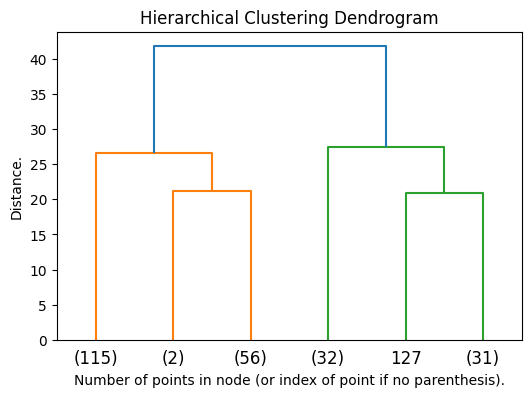

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

_ = dendrogram(Z_scaled, p=6, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

In [18]:
#Attribuer le numéro de cluster à chaque pays de 1 à 6
clusters = fcluster(Z_scaled, 6, criterion='maxclust')
print(clusters)

[1 4 1 1 5 1 3 1 4 1 4 4 1 1 4 5 1 4 1 3 4 4 5 1 3 5 1 1 1 1 3 4 1 1 3 3 3
 3 3 3 4 4 4 5 2 1 5 1 1 3 1 3 1 3 1 5 3 4 1 1 4 1 1 5 5 3 4 3 4 1 5 5 3 3
 1 3 1 1 4 1 1 1 1 3 1 3 4 1 3 1 5 1 1 1 1 1 1 1 1 3 1 1 1 1 2 1 1 1 5 5 4
 5 4 1 1 1 3 1 1 4 3 5 3 3 1 1 5 6 1 3 4 3 1 3 5 1 1 1 1 1 1 1 1 3 1 1 3 1
 3 1 3 1 3 3 1 5 4 4 3 3 1 3 1 1 1 1 1 5 1 1 5 4 1 5 5 1 3 1 1 3 3 1 3 3 1
 5 5 3 1 1 1 4 4 1 1 1 1 4 4 1 3 3 1 1 3 5 1 5 5 1 3 1 3 5 5 4 1 3 5 1 3 3
 1 1 4 1 1 1 4 1 1 3 1 1 1 3 3]


In [19]:
#Ajouter la colonne avec les numéros de clusters à la dataframe
data_volaille_scaled['clusters_dendro_6']=clusters
data_volaille['clusters_dendro_6']=clusters

In [20]:
display(data_volaille_scaled)

Population, milles personnes  \
Zone                                                                   
Afghanistan                                                 0.033841   
Afrique du Sud                                              0.191536   
Albanie                                                    -0.220526   
Algérie                                                     0.072615   
Allemagne                                                   0.386801   
...                                                              ...   
Venezuela (République bolivarienne du)                     -0.018640   
Viet Nam                                                    0.477718   
Yémen                                                      -0.030575   
Zambie                                                     -0.114176   
Zimbabwe                                                   -0.134099   

                                        Muslims_%  distance, km  \
Zone                                                              
Afghanistan                              2.179000      0.122552   
Afrique du Sud                          -0.597700      1.053539   
Albanie                                  1.695722     -1.073314   
Algérie                                  2.147544     -1.152477   
Allemagne                               -0.454718     -1.290635   
...                                           ...           ...   
Venezuela (République bolivarienne du)  -0.623436      0.733277   
Viet Nam                                -0.623436      1.207951   
Yémen                                    2.179000      0.040680   
Zambie                                  -0.623436      0.725451   
Zimbabwe                                -0.623436      0.835015   

                                        Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)  \
Zone                                                                                                              
Afghanistan                                                                     -1.350360                         
Afrique du Sud                                                                   1.331488                         
Albanie                                                                          0.204335                         
Algérie                                                                         -1.019988                         
Allemagne                                                                       -0.067737                         
...                                                                                   ...                         
Venezuela (République bolivarienne du)                                          -0.067737                         
Viet Nam                                                                        -0.514712                         
Yémen                                                                           -0.864518                         
Zambie                                                                          -1.233758                         
Zimbabwe                                                                        -1.136590                         

                                        Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)  \
Zone                                                                                                                       
Afghanistan                                                                     -1.385598                                  
Afrique du Sud                                                                   1.149814                                  
Albanie                                                                         -0.284891                                  
Algérie                                                                         -1.025623                          

In [21]:
#Nombre de pays dans chaque cluster (corresponds à la dendrogramme)
country_count=data_volaille_scaled.groupby('clusters_dendro_6')['Population, milles personnes'].count()
display(country_count)


clusters_dendro_6
1    115
2      2
3     56
4     32
5     31
6      1
Name: Population, milles personnes, dtype: int64

In [22]:
#Les moyennes pour chaque cluster
centroides_dendro_6 = data_volaille.groupby(['clusters_dendro_6']).mean()
display(centroides_dendro_6)

Population, milles personnes  Muslims_%  distance, km  \
clusters_dendro_6                                                          
1                                  1.600672e+04  27.523546   5363.176049   
2                                  1.379849e+06   8.700000   7384.000000   
3                                  2.610416e+04  29.048238   6085.875000   
4                                  3.044792e+04  12.312500   6063.687500   
5                                  1.649812e+04   6.396774   1851.645161   
6                                  5.919100e+02   2.300000    288.000000   

                   Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)  \
clusters_dendro_6                                                                            
1                                                          69.992712                         
2                                                          33.000000                         
3                                                          24.356627                         
4                                                         171.702673                         
5                                                          84.208279                         
6                                                          69.000000                         

                   Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)  \
clusters_dendro_6                                                                                     
1                                                          19.083532                                  
2                                                           7.275000                                  
3                                                           7.125121                                  
4                                                          45.232449                                  
5                                                          23.002747                                  
6                                                          18.330000                                  

                   Disponibilité de matière grasse de la viande de volaille en quantité (g/personne/jour)  \
clusters_dendro_6                                                                                           
1                                                           4.639252                                        
2                                                           2.570000                                        
3                                                           1.538100                                        
4                                                          11.683181                                        
5                                                           5.045980                                        
6                                                           4.280000                                        

                   Disponibilité de protéines de la viande de volaille en quantité (g/personne/jour)  \
clusters_dendro_6                                                                                      
1                                                           6.596805                                   
2                                                           2.355000                                   
3                                                           2.447600                                   
4                                                          15.573369                                   
5                                                           9.063658                                   
6                                                           7.190000                                   

                   Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)  \
clusters_dendr

In [23]:
#Les moyennes scalées pour chaque cluster
centroides_dendro_6_scaled = data_volaille_scaled.groupby(['clusters_dendro_6']).mean()
display(centroides_dendro_6_scaled)

Population, milles personnes  Muslims_%  distance, km  \
clusters_dendro_6                                                          
1                                     -0.120623   0.135039      0.059696   
2                                     10.262410  -0.403245      0.667961   
3                                     -0.043751   0.178639      0.277227   
4                                     -0.010681  -0.299941      0.270549   
5                                     -0.116882  -0.469109     -0.997269   
6                                     -0.237977  -0.586261     -1.467923   

                   Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)  \
clusters_dendro_6                                                                            
1                                                          -0.087312                         
2                                                          -0.806217                         
3                                                          -0.974190                         
4                                                           1.889287                         
5                                                           0.188948                         
6                                                          -0.106604                         

                   Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)  \
clusters_dendro_6                                                                                     
1                                                          -0.082746                                  
2                                                          -0.959195                                  
3                                                          -0.970319                                  
4                                                           1.858070                                  
5                                                           0.208145                                  
6                                                          -0.138674                                  

                   Disponibilité de matière grasse de la viande de volaille en quantité (g/personne/jour)  \
clusters_dendro_6                                                                                           
1                                                          -0.070919                                        
2                                                          -0.652007                                        
3                                                          -0.941786                                        
4                                                           1.907161                                        
5                                                           0.043299                                        
6                                                          -0.171804                                        

                   Disponibilité de protéines de la viande de volaille en quantité (g/personne/jour)  \
clusters_dendro_6                                                                                      
1                                                          -0.109456                                   
2                                                          -1.000617                                   
3                                                          -0.981162                                   
4                                                           1.776428                                   
5                                                           0.408804                                   
6                                                           0.015168                                   

                   Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)  \
clusters_dendr

<Axes: ylabel='clusters_dendro_6'>

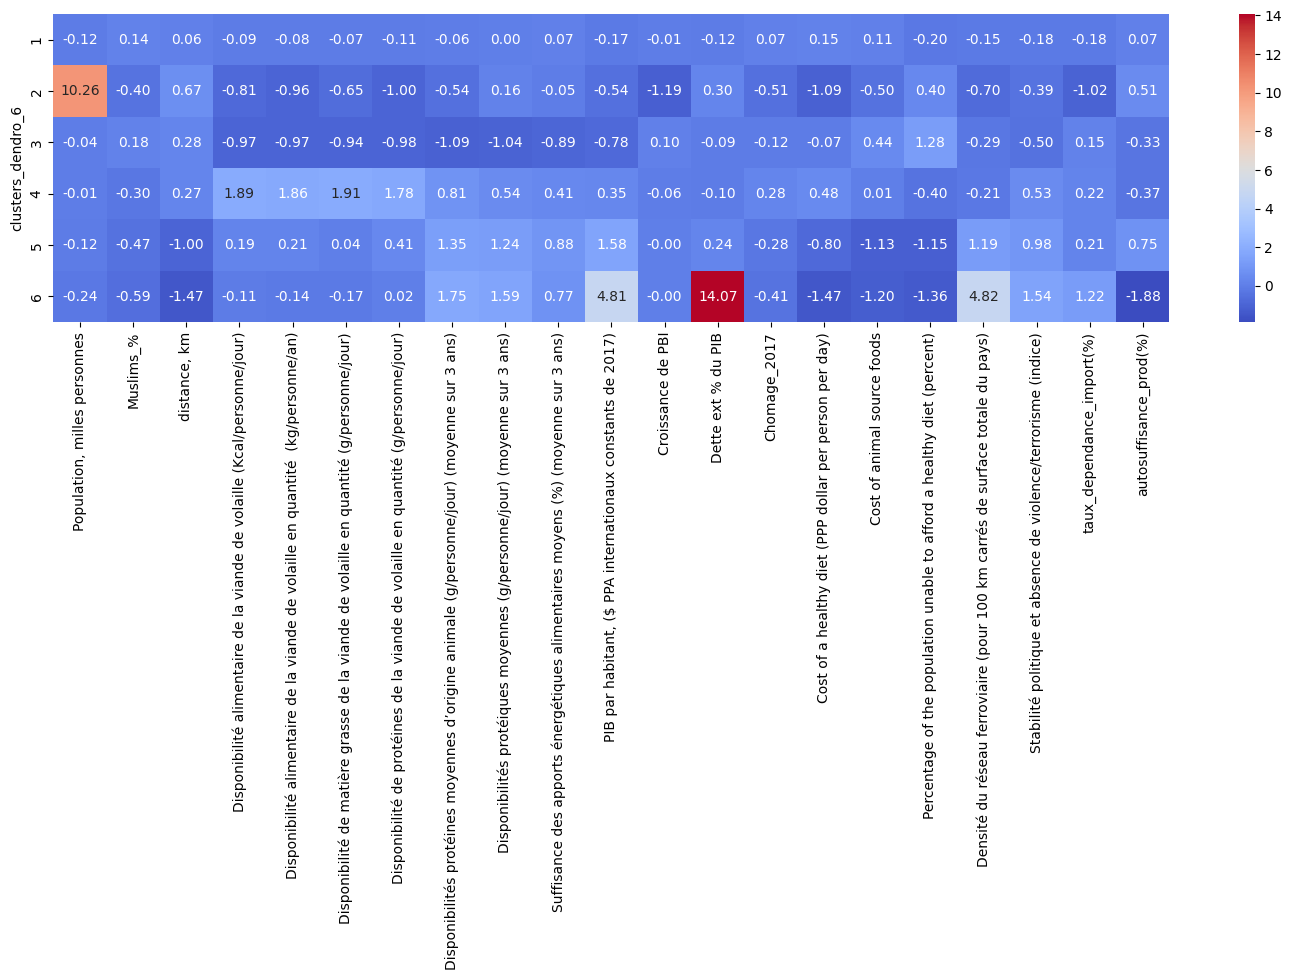

In [24]:
#Présenter les centroides scalés en heatmap

fig, ax = plt.subplots(figsize=(18, 4))
sns.heatmap(centroides_dendro_6_scaled, annot=True, cmap="coolwarm", fmt="0.2f")

In [25]:
#enlever les outliers Chine Inde Luxembourg, clusters 2 et 6
centroides_dendro_6_scaled=centroides_dendro_6_scaled.reset_index()
centroides_dendro_6_scaled_outliers=centroides_dendro_6_scaled.loc[(centroides_dendro_6_scaled['clusters_dendro_6']!=2) & (centroides_dendro_6_scaled['clusters_dendro_6']!=6)]
display(centroides_dendro_6_scaled_outliers)

clusters_dendro_6  Population, milles personnes  Muslims_%  distance, km  \
0                  1                     -0.120623   0.135039      0.059696   
2                  3                     -0.043751   0.178639      0.277227   
3                  4                     -0.010681  -0.299941      0.270549   
4                  5                     -0.116882  -0.469109     -0.997269   

   Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)  \
0                                          -0.087312                         
2                                          -0.974190                         
3                                           1.889287                         
4                                           0.188948                         

   Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)  \
0                                          -0.082746                                  
2                                          -0.970319                                  
3                                           1.858070                                  
4                                           0.208145                                  

   Disponibilité de matière grasse de la viande de volaille en quantité (g/personne/jour)  \
0                                          -0.070919                                        
2                                          -0.941786                                        
3                                           1.907161                                        
4                                           0.043299                                        

   Disponibilité de protéines de la viande de volaille en quantité (g/personne/jour)  \
0                                          -0.109456                                   
2                                          -0.981162                                   
3                                           1.776428                                   
4                                           0.408804                                   

   Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)  \
0                                          -0.060654                                           
2                                          -1.094640                                           
3                                           0.808759                                           
4                                           1.345774                                           

   Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)  \
0                                           0.002286                          
2                                          -1.037194                          
3                                           0.544477                          
4                                           1.241522                          

   Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)  \
0                                           0.072323                                 
2                                          -0.885281                                 
3                                           0.411808                                 
4                                           0.884336                                 

   PIB par habitant, ($ PPA internationaux constants de 2017)  \
0                                          -0.174837            
2                                          -0.780645            
3                                           0.350701            
4                                           1.576595            

   Croissance de PBI  Dette ext % du PIB  Chomage_2017  \
0      -9.663706e-03           -0.121988      0.067595   
2       9.697357e-02           -0.087193     -0.119882   
3      -6.070035e-02           -0.102959      0.279539   
4      

<Axes: >

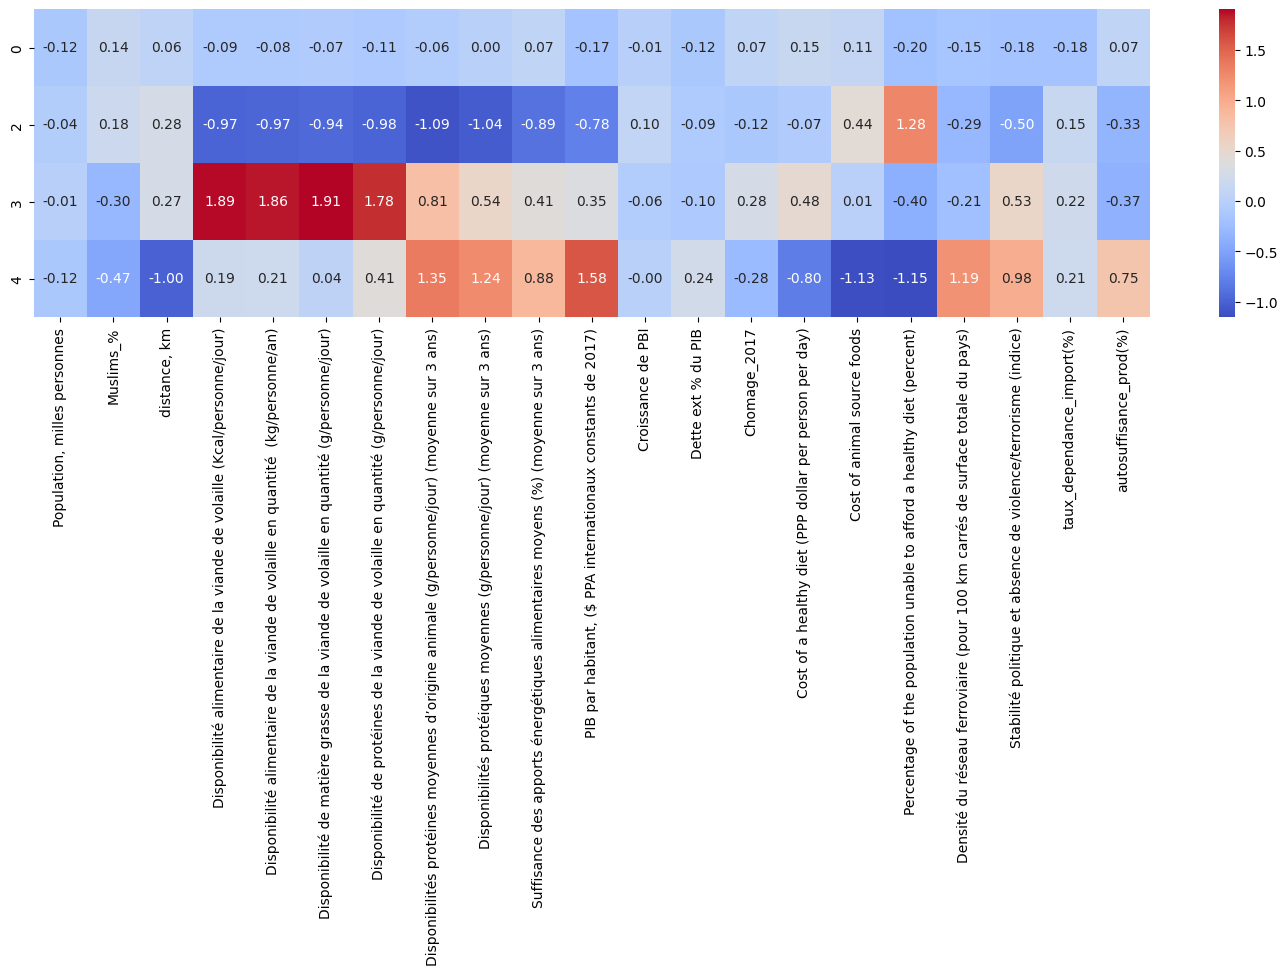

In [26]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.heatmap(centroides_dendro_6_scaled_outliers[features], annot=True, cmap="coolwarm", fmt="0.2f")

In [27]:
#Liste de pays pour chaque cluster
for i in range (1,7):
    print(f'Cluster{i}')
    print(data_volaille_scaled[data_volaille_scaled.clusters_dendro_6==i].index.tolist())
    print()

Cluster1
['Afghanistan', 'Albanie', 'Algérie', 'Andorre', 'Anguilla', 'Antilles néerlandaises (ex)', 'Arménie', 'Aruba', 'Azerbaïdjan', 'Bahreïn', 'Belize', 'Bhoutan', 'Bolivie (État plurinational de)', 'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine', 'Brunéi Darussalam', 'Bulgarie', 'Chine, Taiwan Province de', 'Colombie', 'Comores', 'Costa Rica', 'Croatie', 'Curaçao', 'Égypte', 'El Salvador', 'Équateur', 'Érythrée', 'Fidji', 'Géorgie', 'Gibraltar', 'Grèce', 'Groenland', 'Guadeloupe', 'Guam', 'Guatemala', 'Guinée équatoriale', 'Guyane française', 'Honduras', 'Île de Man', 'Îles Anglo-Normandes', 'Îles Caïmanes', 'Îles Cook', 'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord', 'Îles Marshall', 'Îles Turques-et-Caïques', 'Îles Vierges américaines', 'Îles Vierges britanniques', 'Îles Wallis-et-Futuna', 'Indonésie', "Iran (République islamique d')", 'Iraq', 'Japon', 'Jordanie', 'Kazakhstan', 'Kirghizistan', 'Kiribati', 'Libye', 'Liechtenstein', 'Macédoine du Nord',

# **Clustering par k-means**

### **Déterminer le nombre de clusters par la méthode de la coude**

In [28]:
#Une liste vide pour enregistrer les inerties :
intertia_list = [ ]

# Notre liste de nombres de clusters :
k_list = range(1, 10)

# Pour chaque nombre de clusters :
for k in k_list :

    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)

    # On entraine
    kmeans.fit(X_scaled)

    # On enregistre l'inertie obtenue :
    intertia_list.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

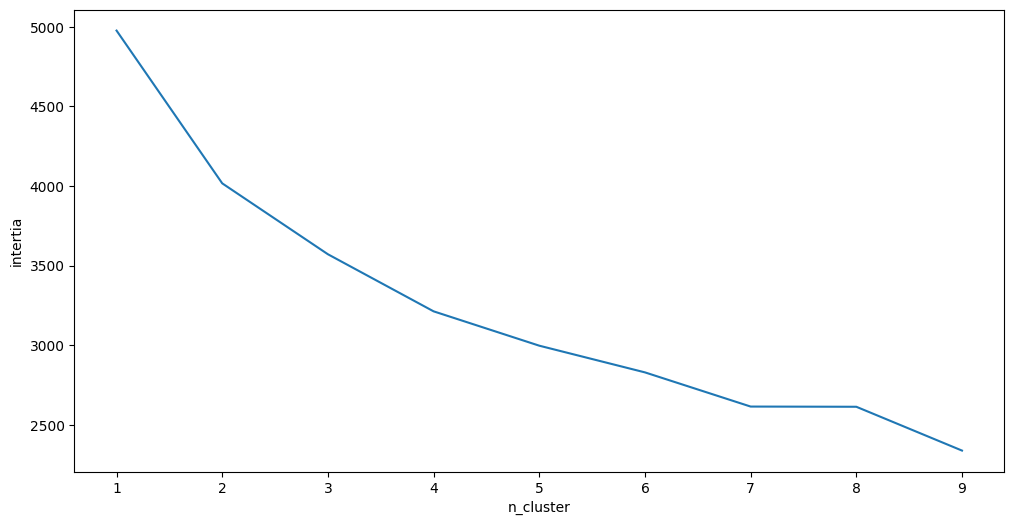

In [29]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

### **Clusters k_means**

In [30]:
#On voit que la courbe est assez lisse, il y a un point sur n_cluster= 2, 4 et 6
#On fait le choix de 6 clusters pour pouvoir comparer des clusters issue de la derdrogramme
#On applique random_state pour fixer le résultat
a=6
kmeans = KMeans(n_clusters=a, random_state=60)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=60)

In [31]:
kmeans.inertia_

2817.2953696101376

In [32]:
#Les numéros des clusters de 0 à 5
kmeans.labels_


array([2, 3, 5, 5, 1, 0, 2, 0, 3, 0, 3, 3, 5, 0, 3, 1, 5, 3, 5, 2, 3, 0,
       1, 0, 2, 0, 0, 0, 0, 5, 2, 3, 0, 0, 2, 2, 0, 0, 2, 2, 3, 3, 3, 3,
       4, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 5, 3, 5, 0, 3, 0, 0, 1, 1, 2,
       3, 2, 0, 0, 1, 1, 0, 2, 5, 2, 0, 5, 3, 0, 0, 0, 0, 2, 0, 2, 3, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 2, 5, 5, 1, 1,
       3, 1, 3, 0, 5, 5, 2, 2, 0, 3, 2, 0, 5, 2, 5, 0, 1, 1, 5, 2, 3, 2,
       5, 2, 1, 5, 0, 0, 5, 5, 0, 0, 0, 5, 5, 0, 2, 0, 0, 0, 2, 0, 2, 2,
       0, 1, 3, 3, 0, 2, 5, 2, 0, 5, 0, 0, 0, 1, 0, 2, 1, 3, 0, 1, 1, 5,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3,
       3, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 5, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0,
       2, 2, 0, 0, 3, 5, 5, 5, 0, 0, 0, 0, 0, 0, 2, 2, 2], dtype=int32)

In [33]:
labels= kmeans.labels_

In [34]:
data_volaille["clusters_kmeans_6"]=labels
data_volaille_scaled["clusters_kmeans_6"] = labels
display(data_volaille_scaled)

Population, milles personnes  \
Zone                                                                   
Afghanistan                                                 0.033841   
Afrique du Sud                                              0.191536   
Albanie                                                    -0.220526   
Algérie                                                     0.072615   
Allemagne                                                   0.386801   
...                                                              ...   
Venezuela (République bolivarienne du)                     -0.018640   
Viet Nam                                                    0.477718   
Yémen                                                      -0.030575   
Zambie                                                     -0.114176   
Zimbabwe                                                   -0.134099   

                                        Muslims_%  distance, km  \
Zone                                                              
Afghanistan                              2.179000      0.122552   
Afrique du Sud                          -0.597700      1.053539   
Albanie                                  1.695722     -1.073314   
Algérie                                  2.147544     -1.152477   
Allemagne                               -0.454718     -1.290635   
...                                           ...           ...   
Venezuela (République bolivarienne du)  -0.623436      0.733277   
Viet Nam                                -0.623436      1.207951   
Yémen                                    2.179000      0.040680   
Zambie                                  -0.623436      0.725451   
Zimbabwe                                -0.623436      0.835015   

                                        Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)  \
Zone                                                                                                              
Afghanistan                                                                     -1.350360                         
Afrique du Sud                                                                   1.331488                         
Albanie                                                                          0.204335                         
Algérie                                                                         -1.019988                         
Allemagne                                                                       -0.067737                         
...                                                                                   ...                         
Venezuela (République bolivarienne du)                                          -0.067737                         
Viet Nam                                                                        -0.514712                         
Yémen                                                                           -0.864518                         
Zambie                                                                          -1.233758                         
Zimbabwe                                                                        -1.136590                         

                                        Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)  \
Zone                                                                                                                       
Afghanistan                                                                     -1.385598                                  
Afrique du Sud                                                                   1.149814                                  
Albanie                                                                         -0.284891                                  
Algérie                                                                         -1.025623                          

In [35]:
#determiner le nombre de pays dans chaque cluster
country_count_kmeans=data_volaille_scaled.groupby('clusters_kmeans_6')['Population, milles personnes'].count()
display(country_count_kmeans)


clusters_kmeans_6
0    95
1    28
2    53
3    29
4     2
5    30
Name: Population, milles personnes, dtype: int64

In [36]:
#determiner les moyennes des variables pour chaque cluster
centroides_kmeans_6 = data_volaille.groupby('clusters_kmeans_6').mean()
#centroides_kmeans_6=centroides_kmeans_6.drop(columns=['clusters_dendro_6'])
display(centroides_kmeans_6)

Population, milles personnes  Muslims_%  distance, km  \
clusters_kmeans_6                                                          
0                                  1.090419e+04   6.773767   6022.539428   
1                                  1.815061e+04   6.160714   1230.892857   
2                                  3.545210e+04  36.509459   5901.981132   
3                                  2.825496e+04  12.665517   6032.931034   
4                                  1.379849e+06   8.700000   7384.000000   
5                                  1.821675e+04  75.606667   3831.166667   

                   Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)  \
clusters_kmeans_6                                                                            
0                                                          77.365622                         
1                                                          82.141825                         
2                                                          20.027484                         
3                                                         181.068966                         
4                                                          33.000000                         
5                                                          54.163776                         

                   Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)  \
clusters_kmeans_6                                                                                     
0                                                          21.090676                                  
1                                                          22.527742                                  
2                                                           5.822173                                  
3                                                          47.299655                                  
4                                                           7.275000                                  
5                                                          15.260343                                  

                   Disponibilité de matière grasse de la viande de volaille en quantité (g/personne/jour)  \
clusters_kmeans_6                                                                                           
0                                                           5.142579                                        
1                                                           4.845128                                        
2                                                           1.279913                                        
3                                                          12.361034                                        
4                                                           2.570000                                        
5                                                           3.456692                                        

                   Disponibilité de protéines de la viande de volaille en quantité (g/personne/jour)  \
clusters_kmeans_6                                                                                      
0                                                           7.254248                                   
1                                                           9.012343                                   
2                                                           1.984215                                   
3                                                          16.345172                                   
4                                                           2.355000                                   
5                                                           5.384561                                   

                   Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)  \
clusters_kmean

In [37]:
#determiner les moyennes scalé des variables pour chaque cluster
centroides_kmeans_6_scaled = data_volaille_scaled.groupby('clusters_kmeans_6').mean()
#centroides_kmeans_6=centroides_kmeans_6.drop(columns=['clusters_dendro_6'])
display(centroides_kmeans_6_scaled)

Population, milles personnes  Muslims_%  distance, km  \
clusters_kmeans_6                                                          
0                                     -0.159469  -0.458328      0.258163   
1                                     -0.104302  -0.475859     -1.184114   
2                                      0.027416   0.392002      0.221875   
3                                     -0.027376  -0.289846      0.261291   
4                                     10.262410  -0.403245      0.667961   
5                                     -0.103798   1.510037     -0.401436   

                   Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)  \
clusters_kmeans_6                                                                            
0                                                           0.055970                         
1                                                           0.148790                         
2                                                          -1.058321                         
3                                                           2.071308                         
4                                                          -0.806217                         
5                                                          -0.394927                         

                   Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)  \
clusters_kmeans_6                                                                                     
0                                                           0.066228                                  
1                                                           0.172889                                  
2                                                          -1.067026                                  
3                                                           2.011502                                  
4                                                          -0.959195                                  
5                                                          -0.366509                                  

                   Disponibilité de matière grasse de la viande de volaille en quantité (g/personne/jour)  \
clusters_kmeans_6                                                                                           
0                                                           0.070426                                        
1                                                          -0.013104                                        
2                                                          -1.014290                                        
3                                                           2.097517                                        
4                                                          -0.652007                                        
5                                                          -0.403006                                        

                   Disponibilité de protéines de la viande de volaille en quantité (g/personne/jour)  \
clusters_kmeans_6                                                                                      
0                                                           0.028666                                   
1                                                           0.398023                                   
2                                                          -1.078515                                   
3                                                           1.938576                                   
4                                                          -1.000617                                   
5                                                          -0.364137                                   

                   Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)  \
clusters_kmean

<Axes: ylabel='clusters_kmeans_6'>

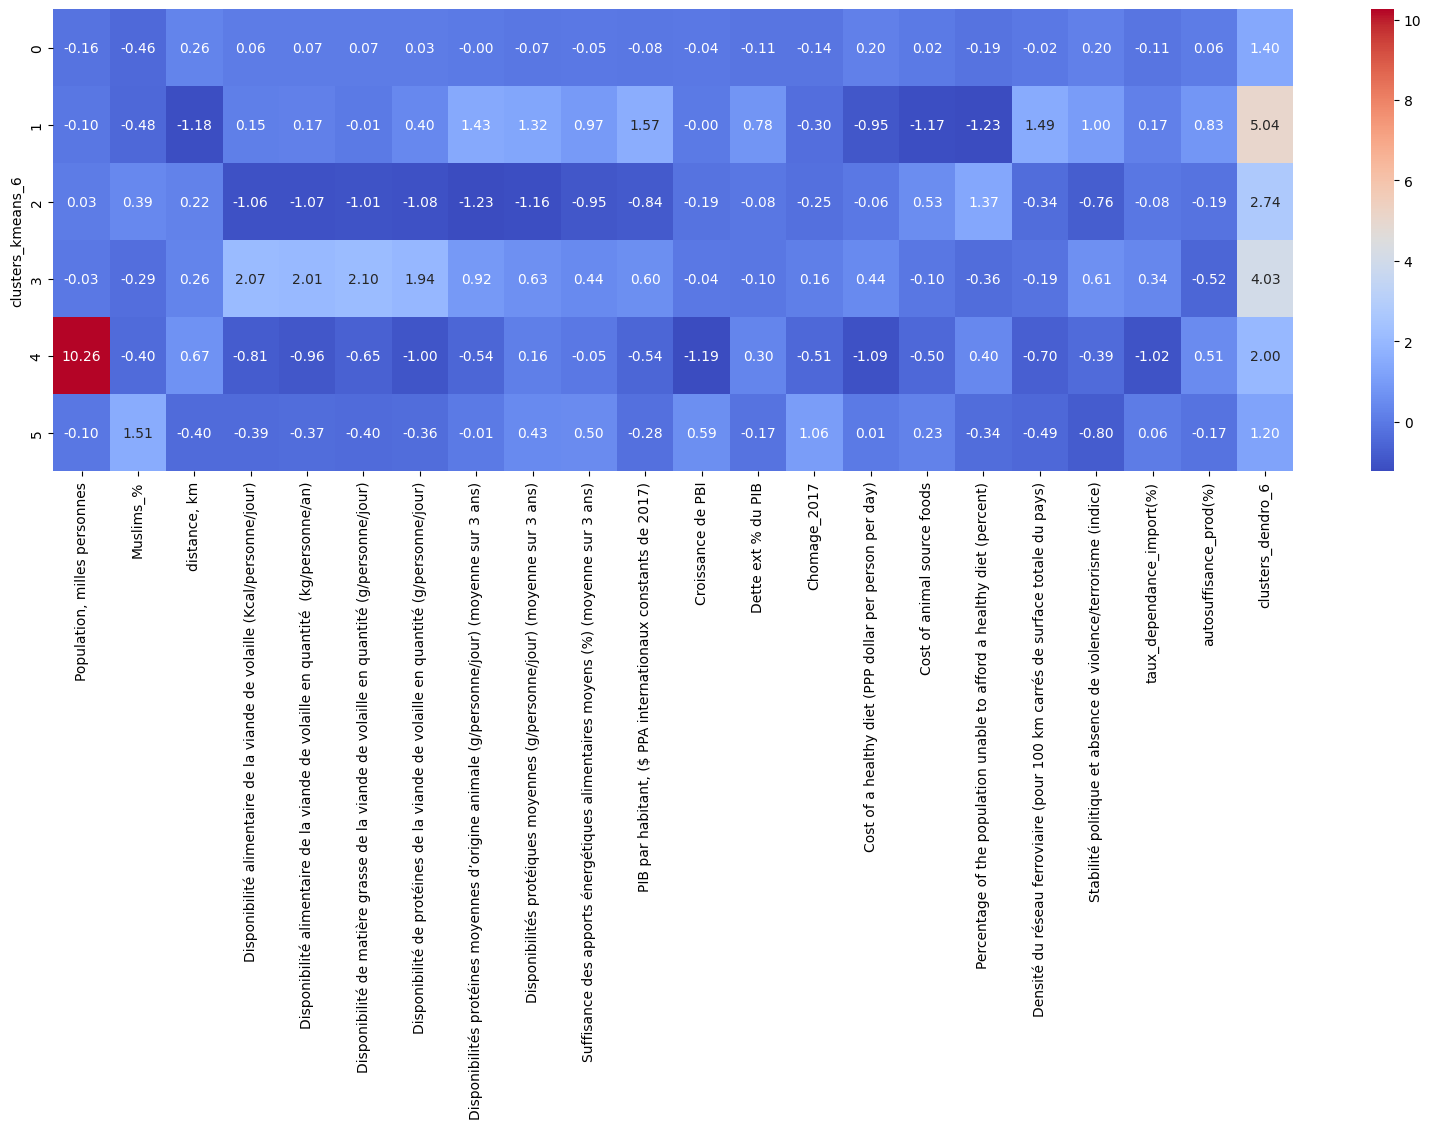

In [38]:
#presenter les moyennes en forme de heatmap

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(centroides_kmeans_6_scaled, annot=True, cmap="coolwarm", fmt="0.2f")

In [39]:
#enlever les outliers cluster 4: Chine Inde
centroides_kmeans_6_scaled=centroides_kmeans_6_scaled.reset_index()
centroides_kmeans_6_scaled_outliers=centroides_kmeans_6_scaled.loc[centroides_kmeans_6_scaled['clusters_kmeans_6']!=4]
display(centroides_kmeans_6_scaled_outliers)

clusters_kmeans_6  Population, milles personnes  Muslims_%  distance, km  \
0                  0                     -0.159469  -0.458328      0.258163   
1                  1                     -0.104302  -0.475859     -1.184114   
2                  2                      0.027416   0.392002      0.221875   
3                  3                     -0.027376  -0.289846      0.261291   
5                  5                     -0.103798   1.510037     -0.401436   

   Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)  \
0                                           0.055970                         
1                                           0.148790                         
2                                          -1.058321                         
3                                           2.071308                         
5                                          -0.394927                         

   Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)  \
0                                           0.066228                                  
1                                           0.172889                                  
2                                          -1.067026                                  
3                                           2.011502                                  
5                                          -0.366509                                  

   Disponibilité de matière grasse de la viande de volaille en quantité (g/personne/jour)  \
0                                           0.070426                                        
1                                          -0.013104                                        
2                                          -1.014290                                        
3                                           2.097517                                        
5                                          -0.403006                                        

   Disponibilité de protéines de la viande de volaille en quantité (g/personne/jour)  \
0                                           0.028666                                   
1                                           0.398023                                   
2                                          -1.078515                                   
3                                           1.938576                                   
5                                          -0.364137                                   

   Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)  \
0                                          -0.001801                                           
1                                           1.425782                                           
2                                          -1.226277                                           
3                                           0.916567                                           
5                                          -0.008849                                           

   Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)  \
0                                          -0.074771                          
1                                           1.318791                          
2                                          -1.159777                          
3                                           0.631725                          
5                                           0.433479                          

   Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)  \
0                                          -0.045584                                 
1                                           0.966003                                 
2                                          -0.947965                                 
3                                           0.439090

<Axes: >

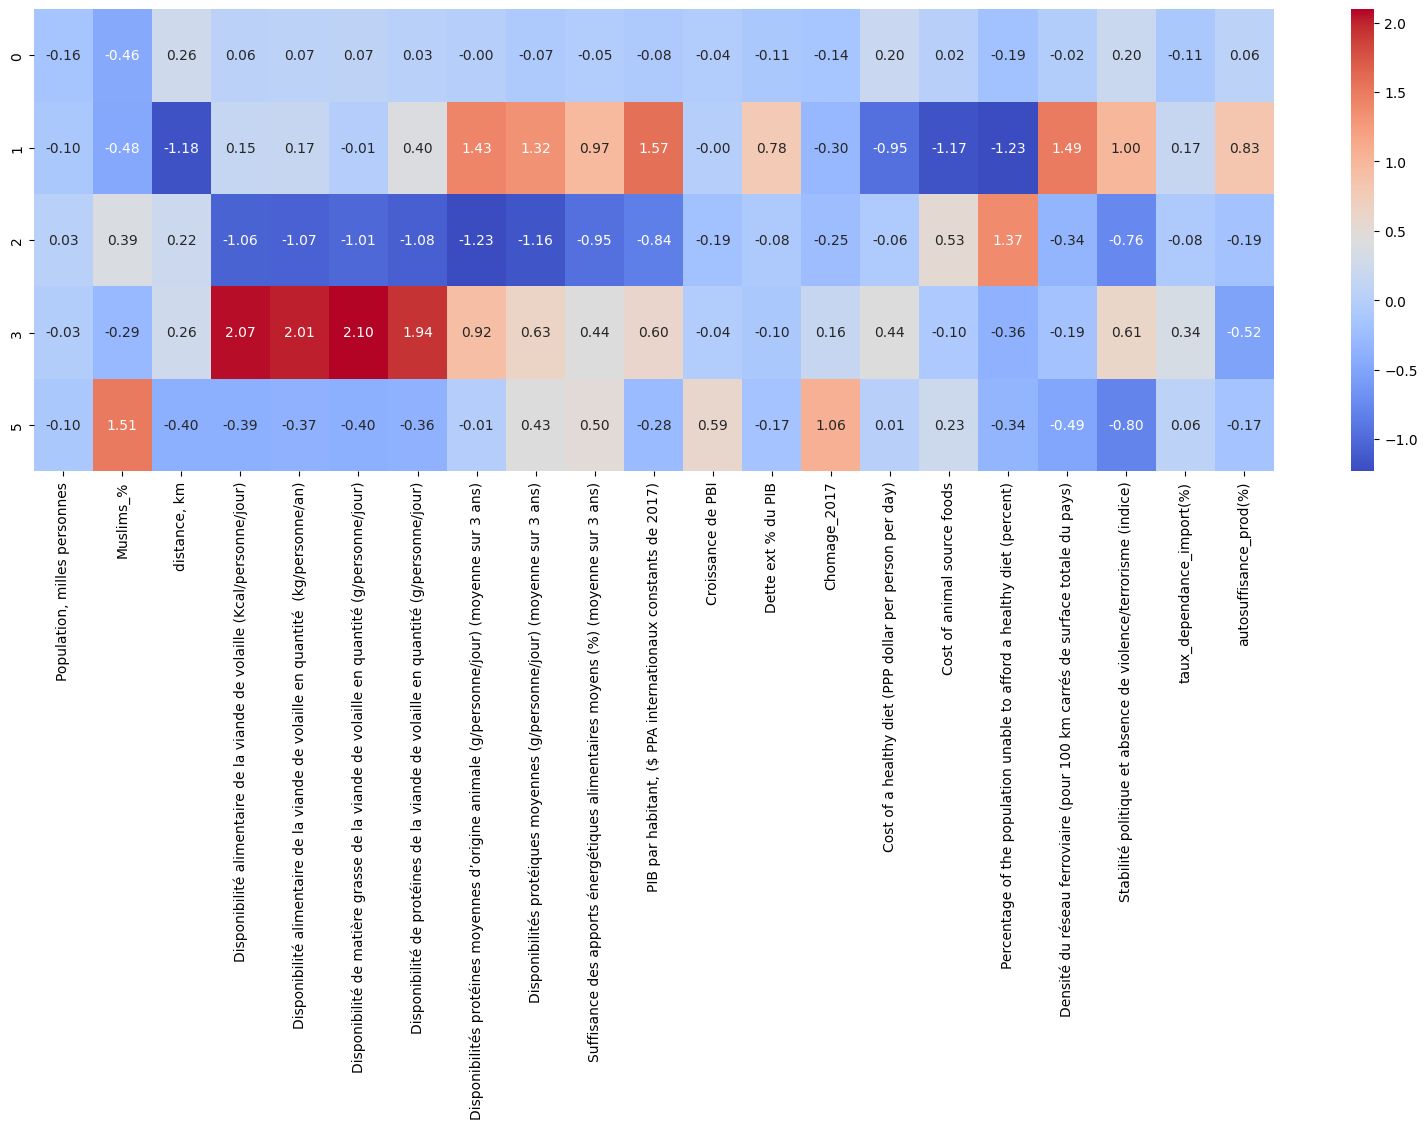

In [40]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(centroides_kmeans_6_scaled_outliers[features], annot=True, cmap="coolwarm", fmt="0.2f")

In [41]:
#la liste des pays pour chaque cluster
for i in range (a):
    print(f'Cluster{i}')
    print(data_volaille_scaled[data_volaille_scaled.clusters_kmeans_6==i].index.tolist())
    print()

Cluster0
['Andorre', 'Anguilla', 'Antilles néerlandaises (ex)', 'Aruba', 'Bélarus', 'Belize', 'Bermudes', 'Bhoutan', 'Bolivie (État plurinational de)', 'Bonaire, Saint-Eustache et Saba', 'Brunéi Darussalam', 'Bulgarie', 'Cabo Verde', 'Cabo Verde', 'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Costa Rica', 'Croatie', 'Cuba', 'Curaçao', 'El Salvador', 'Équateur', 'Érythrée', 'Fédération de Russie', 'Fidji', 'Gabon', 'Gibraltar', 'Groenland', 'Guadeloupe', 'Guam', 'Guatemala', 'Guinée équatoriale', 'Guyane française', 'Honduras', 'Île de Man', 'Îles Anglo-Normandes', 'Îles Caïmanes', 'Îles Cook', 'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord', 'Îles Marshall', 'Îles Turques-et-Caïques', 'Îles Vierges américaines', 'Îles Vierges britanniques', 'Îles Wallis-et-Futuna', 'Japon', 'Kiribati', 'Lettonie', 'Liechtenstein', 'Martinique', 'Maurice', 'Mexique', 'Micronésie (États fédérés de)', 'Monaco', 'Montserrat', 'Myanmar', 'Namibie', 'Nauru', 'Nicaragua', 'Nioué', 'Om

# **ACP analyse en composants principales**

### **Choix de nombres de composantes**

In [42]:
#ACP pour 20 composantes
n_components = 20
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=20)

In [43]:
#variance captée par chaque nouvelle composante
pca.explained_variance_ratio_

array([3.10299422e-01, 1.34647767e-01, 8.68485711e-02, 6.63705981e-02,
       5.54759711e-02, 5.11542528e-02, 4.59347349e-02, 4.21089638e-02,
       3.96343846e-02, 3.29275585e-02, 3.03511121e-02, 2.21722119e-02,
       1.92088049e-02, 1.74242255e-02, 1.56558044e-02, 1.32215623e-02,
       1.12384198e-02, 2.97480834e-03, 2.06291719e-03, 2.86949684e-04])

In [44]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([3.103e+01, 1.346e+01, 8.680e+00, 6.640e+00, 5.550e+00, 5.120e+00,
       4.590e+00, 4.210e+00, 3.960e+00, 3.290e+00, 3.040e+00, 2.220e+00,
       1.920e+00, 1.740e+00, 1.570e+00, 1.320e+00, 1.120e+00, 3.000e-01,
       2.100e-01, 3.000e-02])

In [45]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 31.,  44.,  53.,  60.,  65.,  70.,  75.,  79.,  83.,  87.,  90.,
        92.,  94.,  95.,  97.,  98.,  99., 100., 100., 100.])

In [46]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

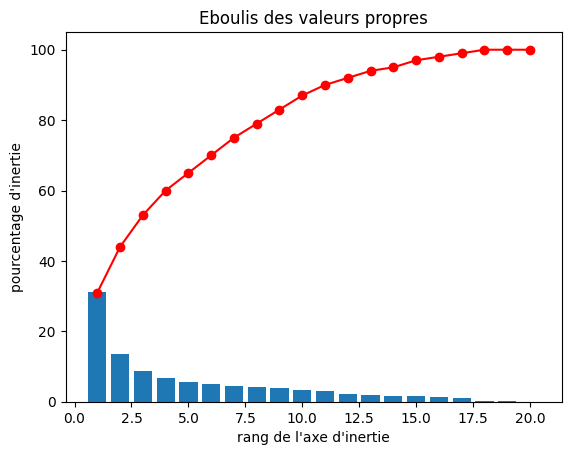

In [47]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

La 1ère composante résume près de 30% de la variance des individus, ce qui fait que si on ajoute à ce pourcentage de variance de la 2ème composante nous résumons 45% de l'information. En ajoutant les 3ème et 4ème  on obtient 60% Donc au lieu de 20 variables explicatives, seules les 4 variables synthétiques suffisent pour comprendre la variabilité des individus.

In [48]:
#Components
pcs = pca.components_
pcs

array([[-0.03294295, -0.13517562, -0.08279211,  0.32274056,  0.32309202,
         0.30427123,  0.33708259,  0.35086081,  0.30967337,  0.24660723,
         0.27183296,  0.0117854 ,  0.08353318, -0.00968162, -0.03614611,
        -0.1754521 , -0.30045028,  0.12741516,  0.23482199,  0.05778096,
         0.0322119 ],
       [ 0.08000345,  0.08480082, -0.31462875, -0.29587896, -0.29073718,
        -0.31821937, -0.24649189,  0.10077655,  0.18692507,  0.21691743,
         0.19591672,  0.00144831,  0.17666252, -0.12946533, -0.3686366 ,
        -0.2866039 , -0.16528717,  0.1919926 ,  0.00167355, -0.10343874,
         0.28617857],
       [-0.27732514, -0.17956183,  0.00098015, -0.11713569, -0.10944014,
        -0.13212012, -0.08919228,  0.02689261, -0.10904274, -0.20357766,
         0.15940229,  0.17576257,  0.34978814, -0.01319132,  0.05823535,
        -0.05979646,  0.07347861,  0.2823268 ,  0.29466417,  0.53137983,
        -0.38155961],
       [ 0.26346985, -0.50261839,  0.24831884,  0.05322551

In [49]:
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6   \
0  -0.032943 -0.135176 -0.082792  0.322741  0.323092  0.304271  0.337083   
1   0.080003  0.084801 -0.314629 -0.295879 -0.290737 -0.318219 -0.246492   
2  -0.277325 -0.179562  0.000980 -0.117136 -0.109440 -0.132120 -0.089192   
3   0.263470 -0.502618  0.248319  0.053226  0.036692  0.074607  0.017572   
4   0.275584  0.406028  0.025557  0.106958  0.113104  0.095917  0.120825   
5   0.214571  0.014266 -0.124464 -0.017069 -0.024128 -0.015083 -0.018765   
6   0.512585 -0.095482  0.185983 -0.149931 -0.161279 -0.143077 -0.155087   
7   0.469020 -0.059666  0.258906  0.038149  0.018881  0.053552  0.013001   
8  -0.073744  0.270226  0.135470  0.010546  0.027018  0.008133  0.012200   
9  -0.267598  0.264301  0.797640 -0.062838 -0.066588 -0.058909 -0.067264   
10  0.369919  0.159886  0.042975  0.012075  0.025840 -0.001105  0.031764   
11  0.115565  0.331075 -0.181360  0.023144  0.011575  0.046572 -0.017152   
12 -0.064391 -0.180347 -0.013406  0.018232  0.009858  0.011584  0.028974   
13  0.049316 -0.091522 -0.102058  0.010477  0.010384 -0.034472  0.078134   
14  0.014903  0.239464 -0.040306  0.077004  0.053004  0.104074  0.034894   
15 -0.072324 -0.294041  0.107737 -0.040366 -0.046158 -0.041350 -0.035165   
16 -0.034400  0.202184 -0.003125 -0.007934 -0.035714 -0.023753  0.019437   
17  0.021542 -0.020300  0.033653 -0.172995  0.311886 -0.668429  0.597075   
18  0.023482  0.088642  0.018817 -0.065664  0.043255 -0.184810  0.119359   
19  0.002505 -0.005243 -0.008955 -0.224256  0.803772 -0.062099 -0.544326   

          7         8         9         10        11        12        13  \
0   0.350861  0.309673  0.246607  0.271833  0.011785  0.083533 -0.009682   
1   0.100777  0.186925  0.216917  0.195917  0.001448  0.176663 -0.129465   
2   0.026893 -0.109043 -0.203578  0.159402  0.175763  0.349788 -0.013191   
3  -0.099509 -0.231967 -0.227497  0.024385 -0.248978  0.075296 -0.498445   
4  -0.081050 -0.033789 -0.038281  0.053498 -0.297266  0.215435 -0.167176   
5  -0.005576  0.068869  0.119346  0.088025 -0.579463  0.373451  0.191336   
6   0.187512  0.254625  0.150467  0.078796 -0.024865 -0.140779 -0.077356   
7  -0.010469 -0.020579 -0.077994 -0.007245  0.506532  0.434904  0.418225   
8  -0.011790  0.046731  0.208327  0.247018  0.365371  0.219431 -0.635427   
9   0.054507  0.098353 -0.017236  0.171262 -0.214085 -0.014227  0.141411   
10  0.012809 -0.036779  0.024995 -0.114491  0.159125 -0.479170 -0.088577   
11 -0.091480 -0.252919 -0.476454  0.404351 -0.033398 -0.017337  0.029725   
12  0.162929  0.073493 -0.115913 -0.171068  0.019116  0.272043 -0.072041   
13  0.142964  0.108308 -0.313169  0.571534  0.078500 -0.219461  0.118696   
14 -0.223162 -0.112742  0.337363  0.035032  0.029479  0.062144  0.115018   
15 -0.003163 -0.013936  0.260287  0.381742 -0.089466 -0.184554  0.128407   
16  0.456536  0.414833 -0.397881 -0.270424 -0.057857  0.013536 -0.080839   
17 -0.212148  0.104827 -0.034858 -0.025945 -0.002599  0.017396  0.004077   
18  0.671640 -0.664325  0.174227 -0.033093 -0.033189  0.010651  0.030550   
19  0.035674  0.026518 -0.014713  0.011159 -0.004134  0.002134  0.009757   

          14        15        16        17        18        19        20  
0  -0.036146 -0.175452 -0.300450  0.127415  0.234822  0.057781  0.032212  
1  -0.368637 -0.286604 -0.165287  0.191993  0.001674 -0.103439  0.286179  
2   0.058235 -0.059796  0.073479  0.282327  0.294664  0.531380 -0.381560  
3  -0.130900 -0.122543  0.112922  0.177724  0.169065 -0.165232  0.204210  
4  -0.397171 -0.252846  0.123087 -0.165086 -0.249249  0.231014 -0.395188  
5   0.305077  0.450445  0.005652  0.301713 -0.093036  0.024709  0.043487  
6   0.245111  0.023626 -0.028513 -0.446359  0.345508  0.173621 -0.187255  
7  -0.059687 -0.060471  0.014197  0.114954 -0.125641 -0.200976  0.021674  
8   0.258991  0.295444  0.071496  0.019730 -0.182642 -0.128115 -0.018457  
9  -0.122659 -0.011997 -0.165344  0.071068  0.057108  0.053779  0.

In [50]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Population, milles personnes  Muslims_%  distance, km  \
F1                          -0.03      -0.14         -0.08   
F2                           0.08       0.08         -0.31   
F3                          -0.28      -0.18          0.00   
F4                           0.26      -0.50          0.25   
F5                           0.28       0.41          0.03   
F6                           0.21       0.01         -0.12   
F7                           0.51      -0.10          0.19   
F8                           0.47      -0.06          0.26   
F9                          -0.07       0.27          0.14   
F10                         -0.27       0.26          0.80   
F11                          0.37       0.16          0.04   
F12                          0.12       0.33         -0.18   
F13                         -0.06      -0.18         -0.01   
F14                          0.05      -0.09         -0.10   
F15                          0.01       0.24         -0.04   
F16                         -0.07      -0.29          0.11   
F17                         -0.03       0.20         -0.00   
F18                          0.02      -0.02          0.03   
F19                          0.02       0.09          0.02   
F20                          0.00      -0.01         -0.01   

     Disponibilité alimentaire de la viande de volaille (Kcal/personne/jour)  \
F1                                                0.32                         
F2                                               -0.30                         
F3                                               -0.12                         
F4                                                0.05                         
F5                                                0.11                         
F6                                               -0.02                         
F7                                               -0.15                         
F8                                                0.04                         
F9                                                0.01                         
F10                                              -0.06                         
F11                                               0.01                         
F12                                               0.02                         
F13                                               0.02                         
F14                                               0.01                         
F15                                               0.08                         
F16                                              -0.04                         
F17                                              -0.01                         
F18                                              -0.17                         
F19                                              -0.07                         
F20                                              -0.22                         

     Disponibilité alimentaire de la viande de volaille en quantité  (kg/personne/an)  \
F1                                                0.32                                  
F2                                               -0.29                                  
F3                                               -0.11                                  
F4                                                0.04                                  
F5                                                0.11                                  
F6                                               -0.02                                  
F7                                               -0.16                                  
F8                                                0.02                                  
F9                                                0.03                                  
F10                                              -0.07                                  
F11                                       

In [51]:
pcs.T

F1        F2  \
Population, milles personnes                       -0.032943  0.080003   
Muslims_%                                          -0.135176  0.084801   
distance, km                                       -0.082792 -0.314629   
Disponibilité alimentaire de la viande de volai...  0.322741 -0.295879   
Disponibilité alimentaire de la viande de volai...  0.323092 -0.290737   
Disponibilité de matière grasse de la viande de...  0.304271 -0.318219   
Disponibilité de protéines de la viande de vola...  0.337083 -0.246492   
Disponibilités protéines moyennes d’origine ani...  0.350861  0.100777   
Disponibilités protéiques moyennes (g/personne/...  0.309673  0.186925   
Suffisance des apports énergétiques alimentaire...  0.246607  0.216917   
PIB par habitant, ($ PPA internationaux constan...  0.271833  0.195917   
Croissance de PBI                                   0.011785  0.001448   
Dette ext % du PIB                                  0.083533  0.176663   
Chomage_2017                                       -0.009682 -0.129465   
Cost of a healthy diet (PPP dollar per person p... -0.036146 -0.368637   
Cost of animal source foods                        -0.175452 -0.286604   
Percentage of the population unable to afford a... -0.300450 -0.165287   
Densité du réseau ferroviaire (pour 100 km carr...  0.127415  0.191993   
Stabilité politique et absence de violence/terr...  0.234822  0.001674   
taux_dependance_import(%)                           0.057781 -0.103439   
autosuffisance_prod(%)                              0.032212  0.286179   

                                                          F3        F4  \
Population, milles personnes                       -0.277325  0.263470   
Muslims_%                                          -0.179562 -0.502618   
distance, km                                        0.000980  0.248319   
Disponibilité alimentaire de la viande de volai... -0.117136  0.053226   
Disponibilité alimentaire de la viande de volai... -0.109440  0.036692   
Disponibilité de matière grasse de la viande de... -0.132120  0.074607   
Disponibilité de protéines de la viande de vola... -0.089192  0.017572   
Disponibilités protéines moyennes d’origine ani...  0.026893 -0.099509   
Disponibilités protéiques moyennes (g/personne/... -0.109043 -0.231967   
Suffisance des apports énergétiques alimentaire... -0.203578 -0.227497   
PIB par habitant, ($ PPA internationaux constan...  0.159402  0.024385   
Croissance de PBI                                   0.175763 -0.248978   
Dette ext % du PIB                                  0.349788  0.075296   
Chomage_2017                                       -0.013191 -0.498445   
Cost of a healthy diet (PPP dollar per person p...  0.058235 -0.130900   
Cost of animal source foods                        -0.059796 -0.122543   
Percentage of the population unable to afford a...  0.073479  0.112922   
Densité du réseau ferroviaire (pour 100 km carr...  0.282327  0.177724   
Stabilité politique et absence de violence/terr...  0.294664  0.169065   
taux_dependance_import(%)                           0.531380 -0.165232   
autosuffisance_prod(%)                             -0.381560  0.204210   

                                                          F5        F6  \
Population, milles personnes                        0.275584  0.214571   
Muslims_%                                           0.406028  0.014266   
distance, km                                        0.025557 -0.124464   
Disponibilité alimentaire de la viande de volai...  0.106958 -0.017069   
Disponibilité alimentaire de la viande de volai...  0.113104 -0.024128   
Disponibilité de matière grasse de la viande de...  0.095917 -0.015083   
Disponibilité de protéines de la viande de vola...  0.120825 -0.018765   
Disponibilités protéines moyennes d’origine ani... -0.081050 -0.005576   
Disponibilités protéiques moyennes (g/personne/... -0.033789  0.068869   
Suffisance des apports énergétiques alimentaire... -0.038281

<Axes: >

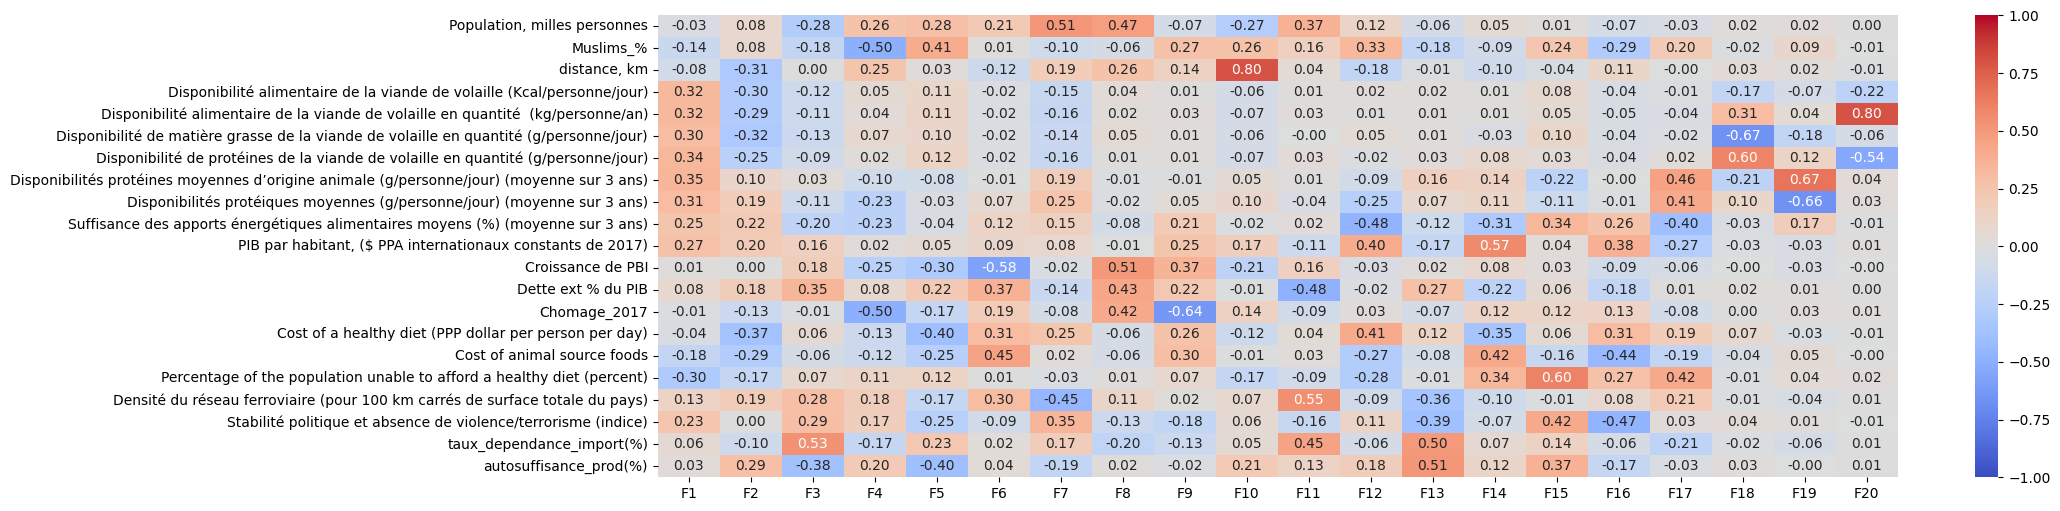

In [52]:
#heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")


### **Cercles de correlation sur 2 premiers plans factoriels**

In [53]:
#fonction pour dessiner un cercle des correlations
def correlation_graph(pca,
                      x_y,
                      features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(20, 20))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [54]:
#F1F2
x_y = (0,1)
x_y

(0, 1)

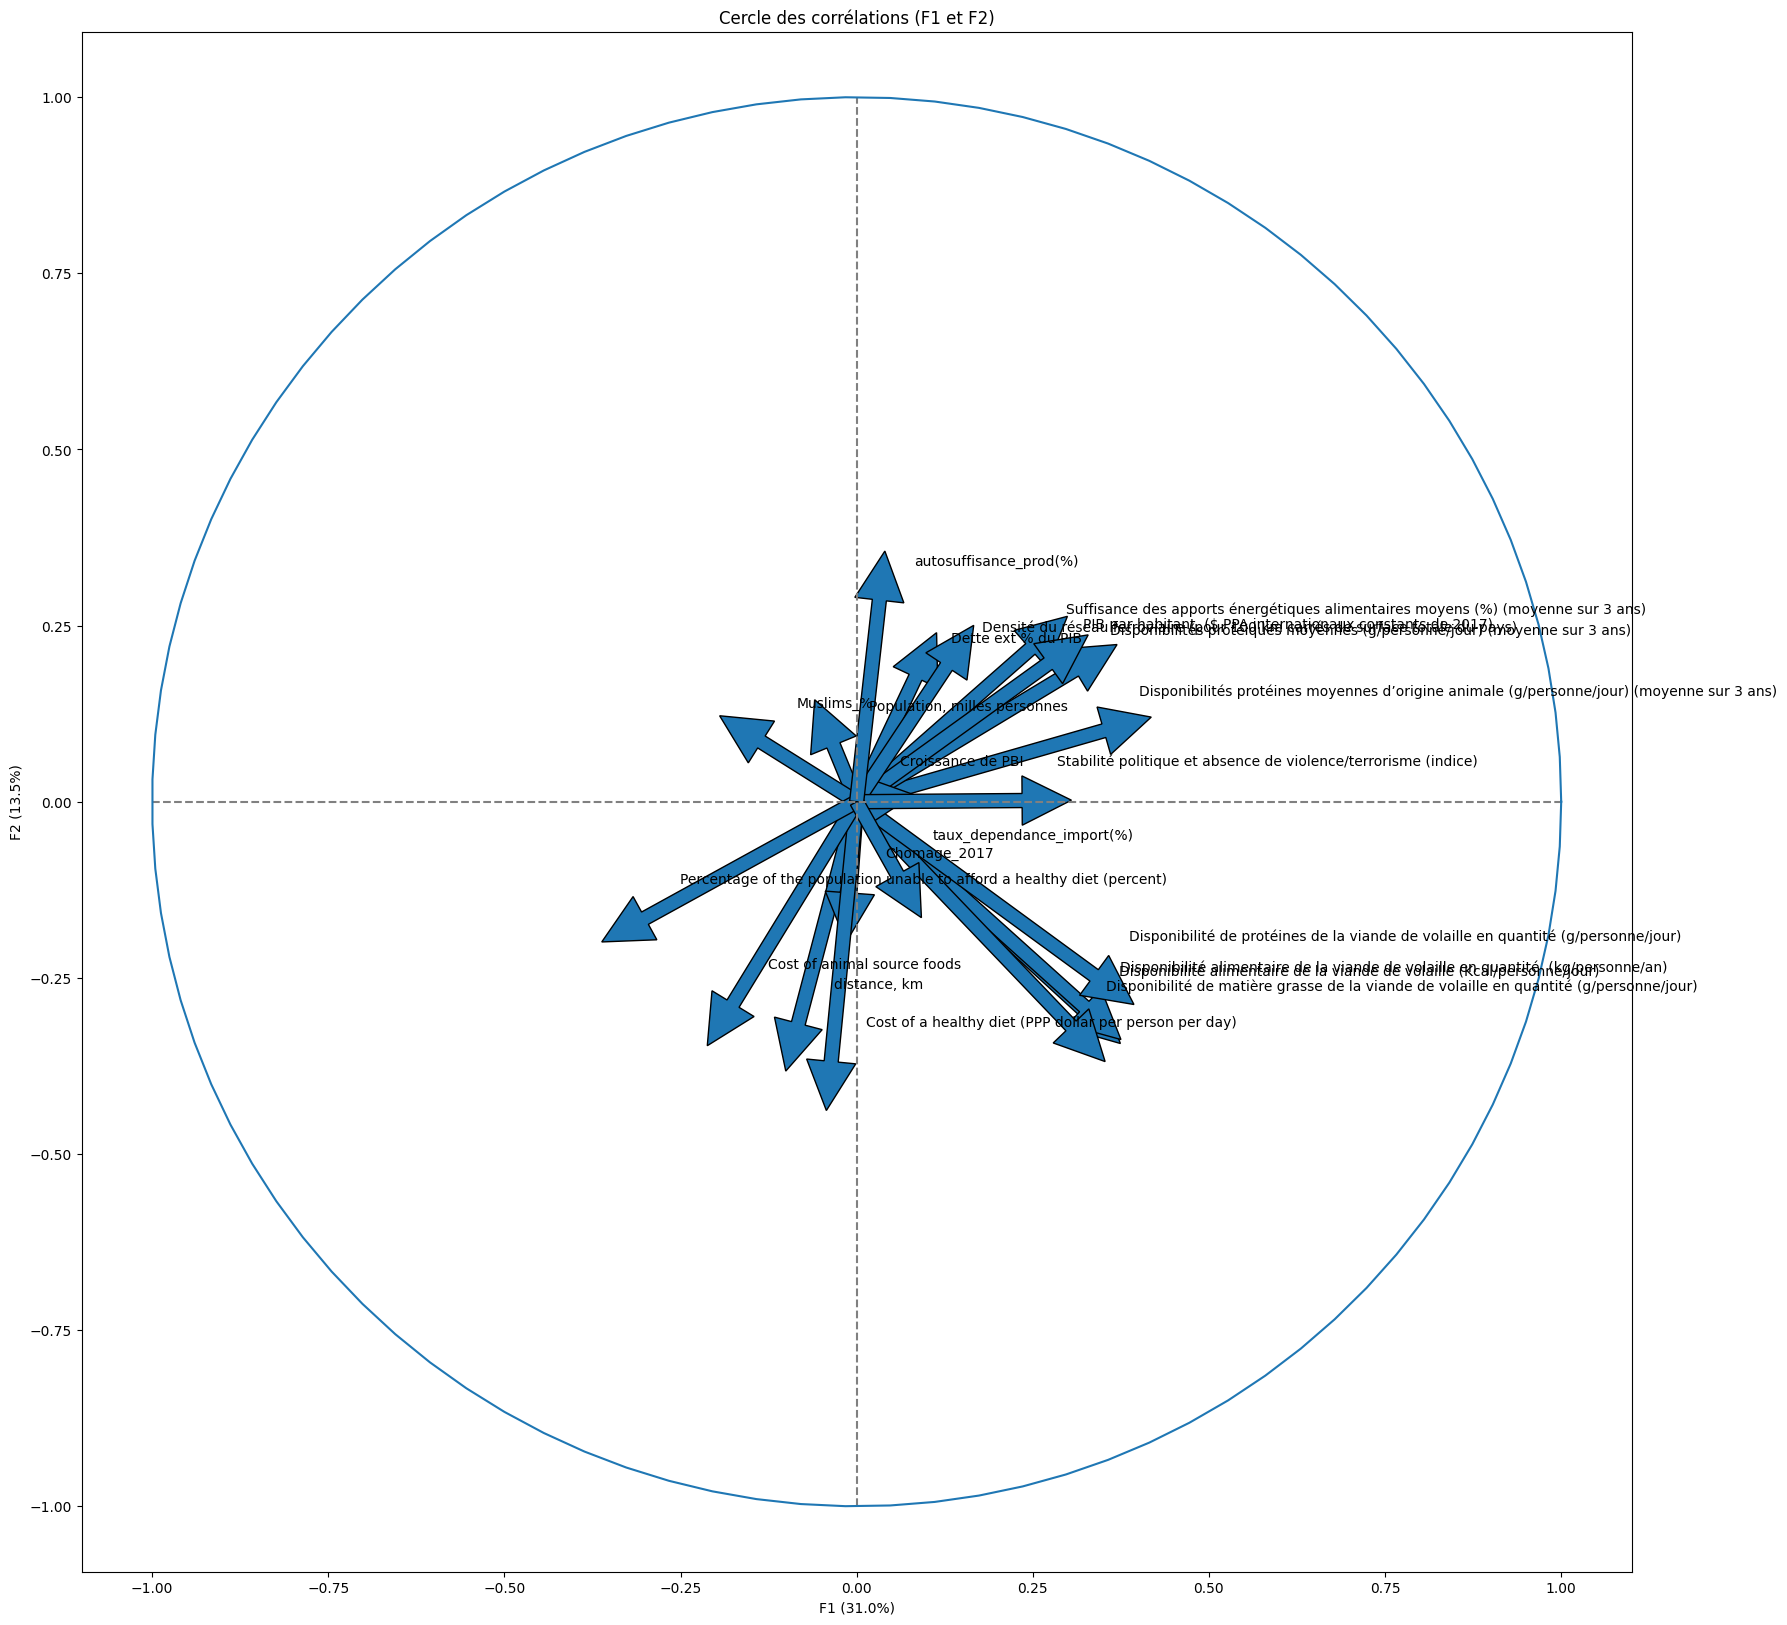

In [55]:
correlation_graph(pca, x_y, features)

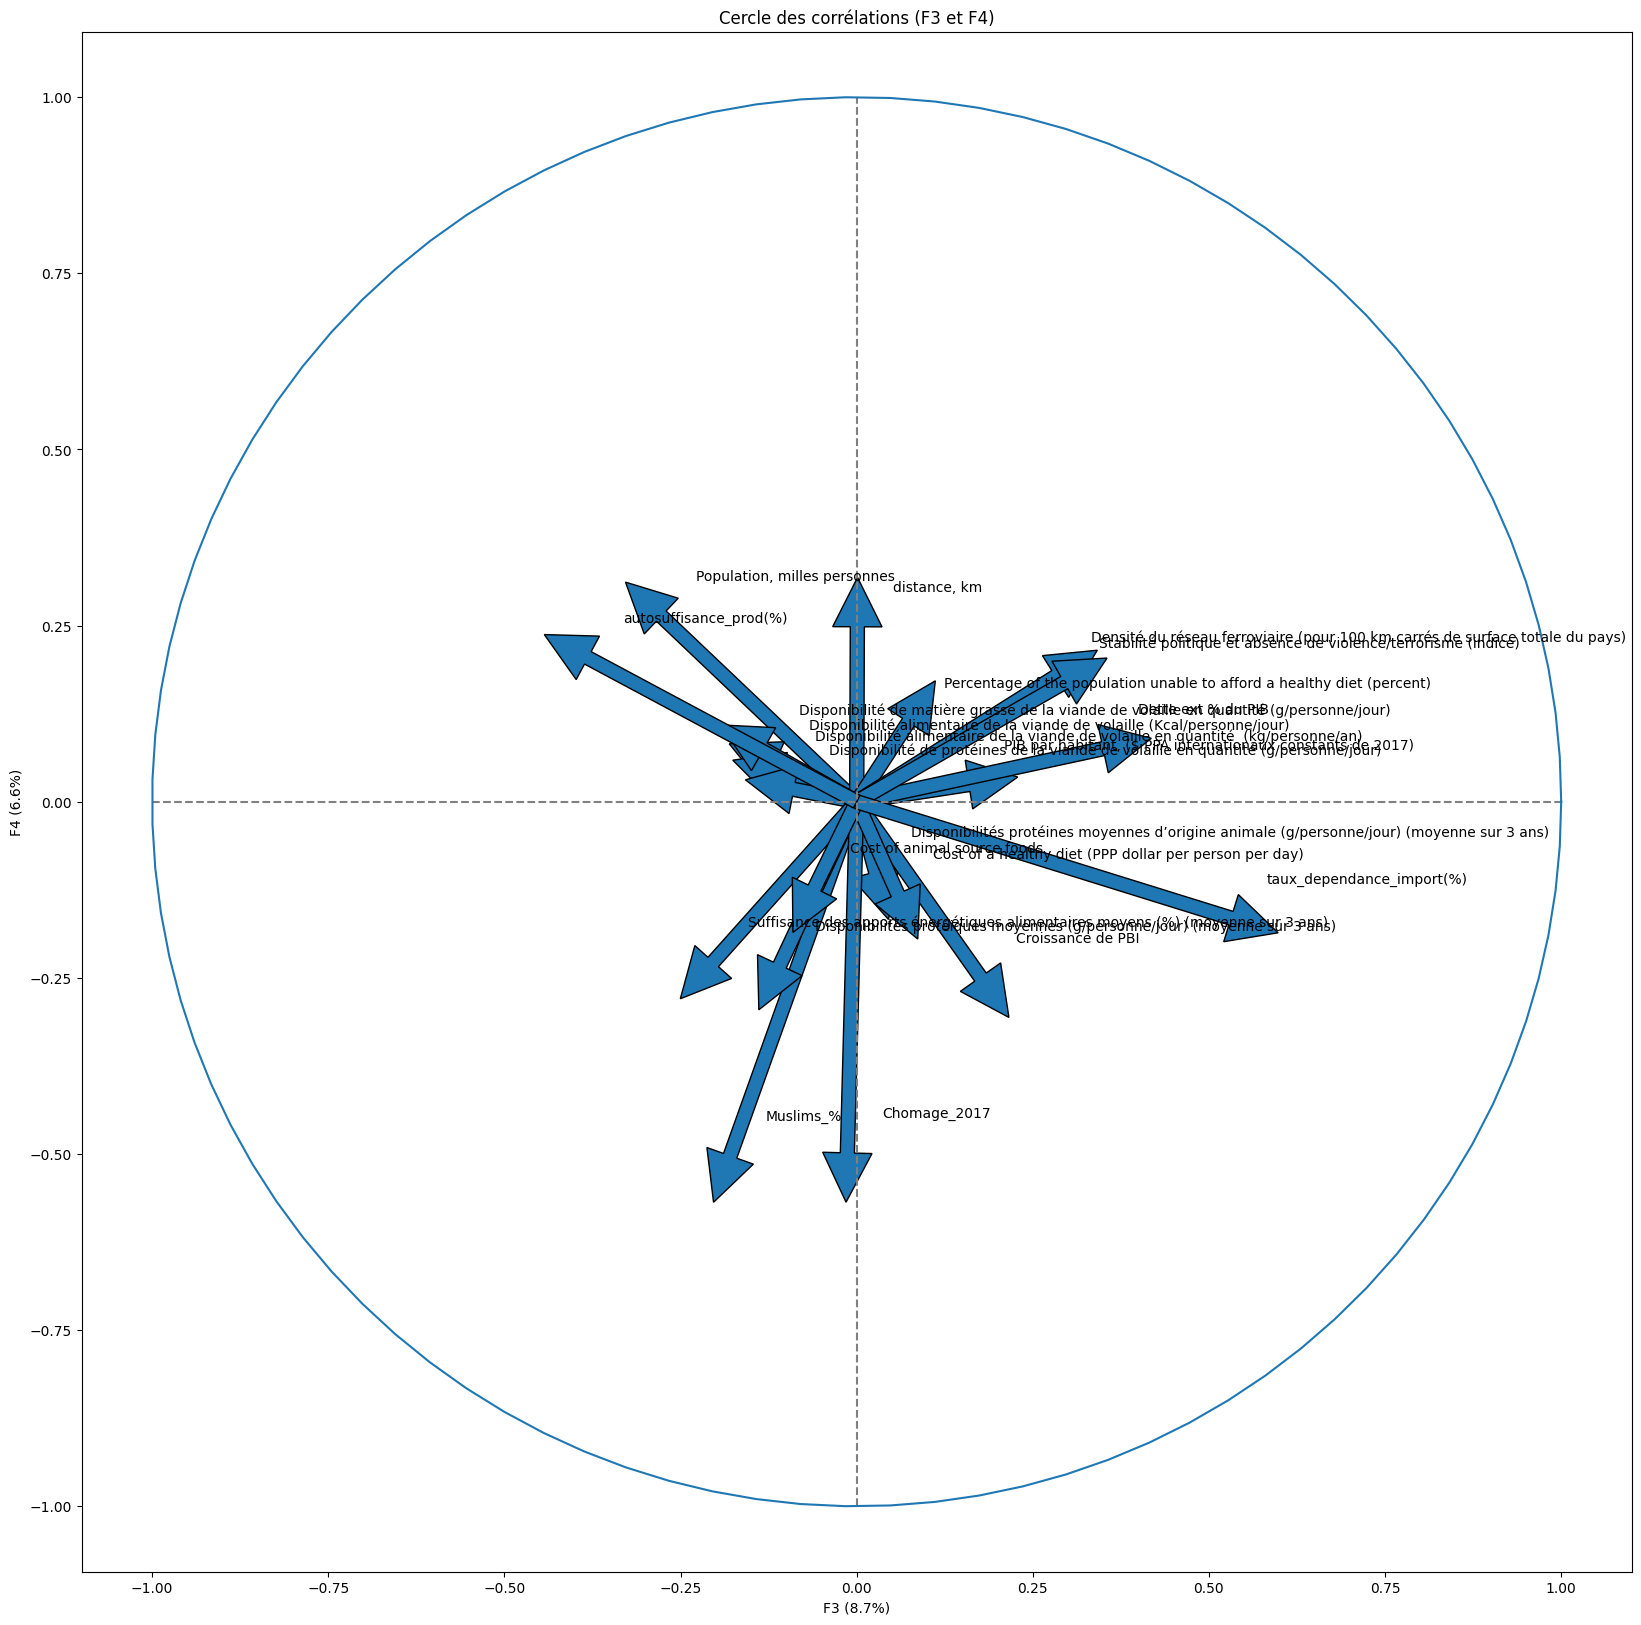

In [56]:
#F3F4
correlation_graph(pca, (2,3), features)

### **Projection des pays sur le 1er et 2ème plan factoriel**

In [57]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-4.22860339,  0.54665325, -0.32057218, -1.69015465,  1.3285894 ,
         0.12523854, -1.09242261,  0.40467349,  0.06874984,  0.45060315,
         0.88411604,  0.74303412,  0.20267682, -0.58274601, -1.18307978,
         0.65461361, -0.17956367, -0.10661717,  0.00462043, -0.05516144],
       [ 0.73047503, -3.49912732, -1.19735339, -0.89352547, -0.73701599,
         1.38336938, -0.25730585,  1.45189643, -1.54927973,  0.37500107,
        -0.5987087 , -0.15300675,  0.06095831,  0.57769534,  0.88738416,
         0.82585708,  0.1588474 ,  0.32695595,  0.09793187, -0.23141857],
       [ 0.89456644, -0.55032615,  0.12320188, -3.26877807, -0.30987794,
         1.59955405,  1.18356672, -0.66725536,  0.35170725, -0.32773618,
         0.42753596, -0.61878361, -0.54702885,  0.06660162, -0.02910035,
        -0.85232862,  0.98009278, -0.75400626, -0.04154778, -0.14869037],
       [-1.77186515,  1.46938887, -2.38396491, -2.50417639,  0.11175402,
         1.56515064,  0.83724376, -1.16729307,  

In [58]:
#F1F2
x_y

(0, 1)

In [59]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="o",
                                markersize= 24):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette='bright')

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


<ipython-input-59-3e22c310a028>:61: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette='bright')


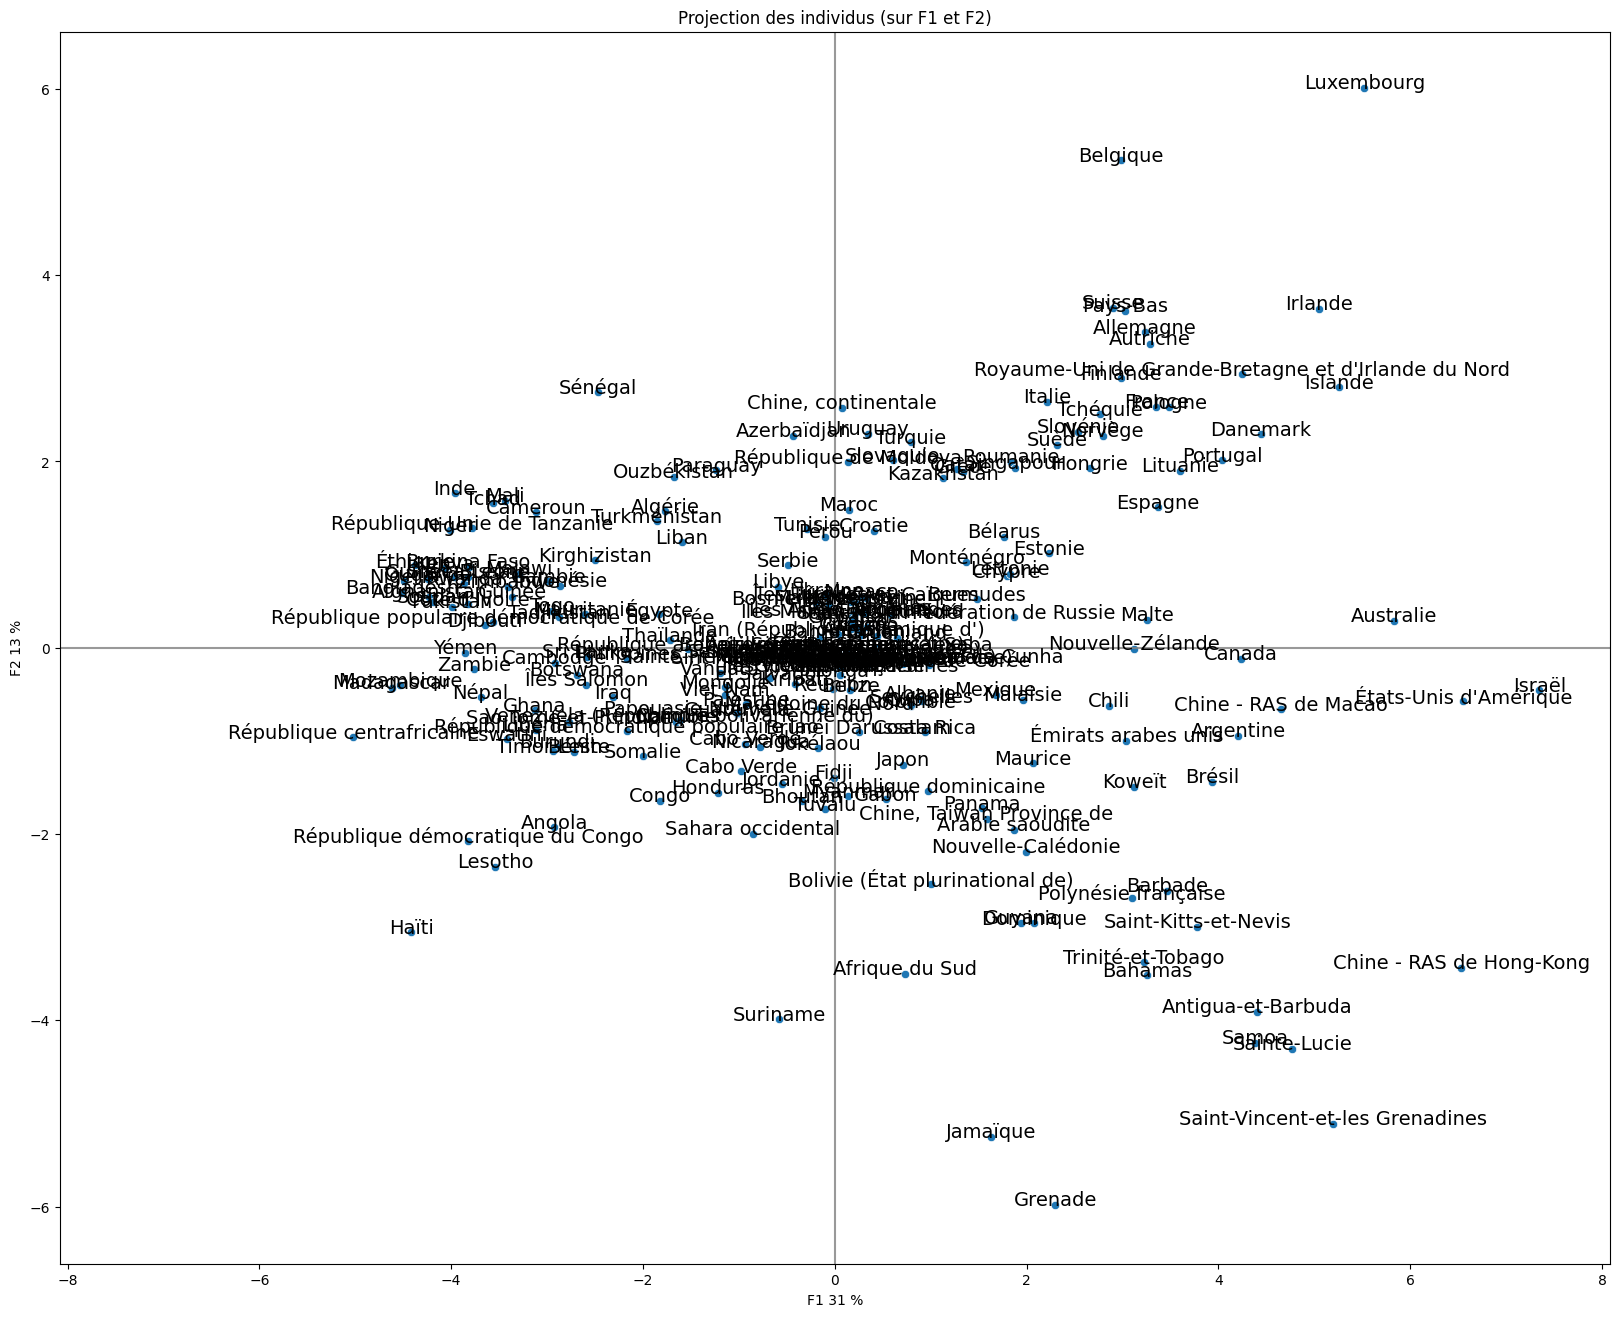

In [60]:
#, labels=names clusters=data_volaille['Population, milles personnes'] pour couleur
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), marker="o", labels=names)

<ipython-input-59-3e22c310a028>:61: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette='bright')


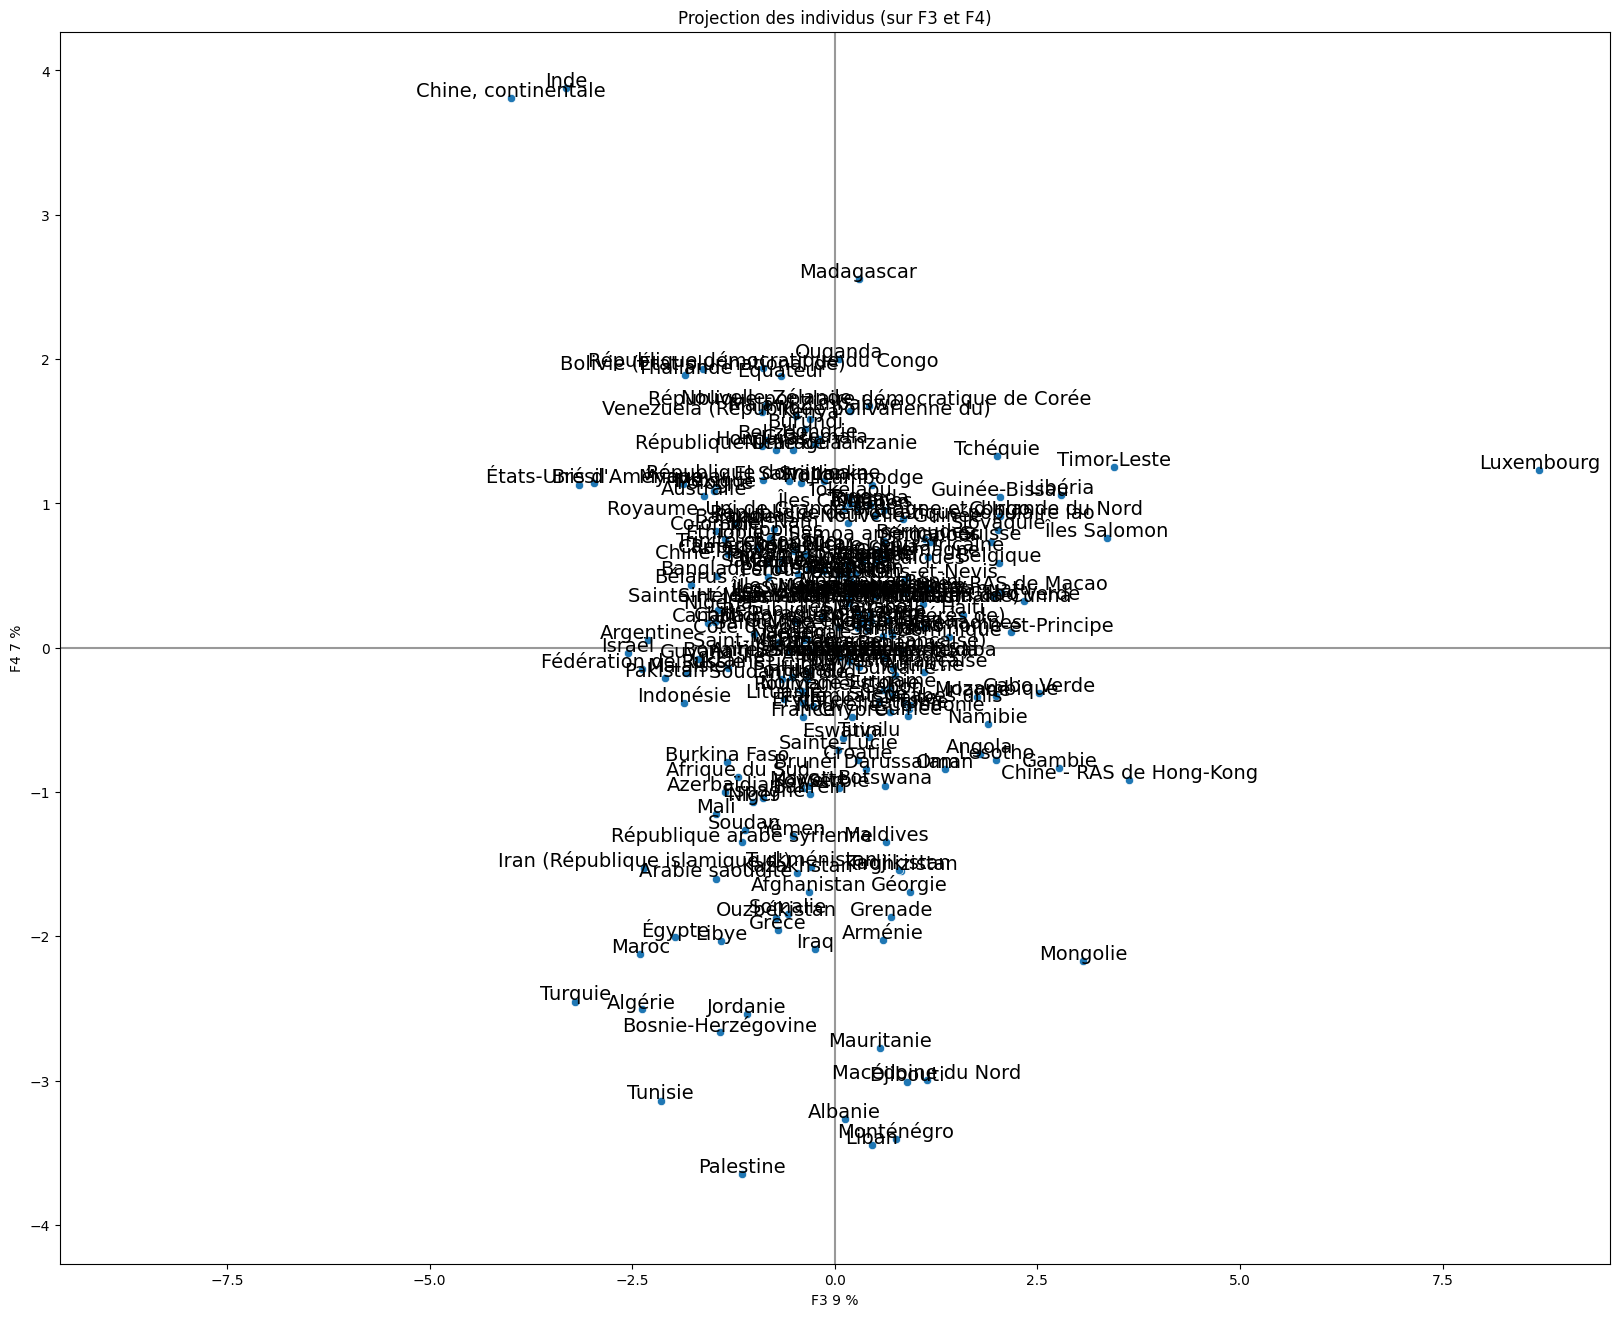

In [61]:
#F3F4
x_y = 2,3
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16),  marker="o", labels=names)

###**Les clusters ACH et k_means sur 1er plan factoriel**

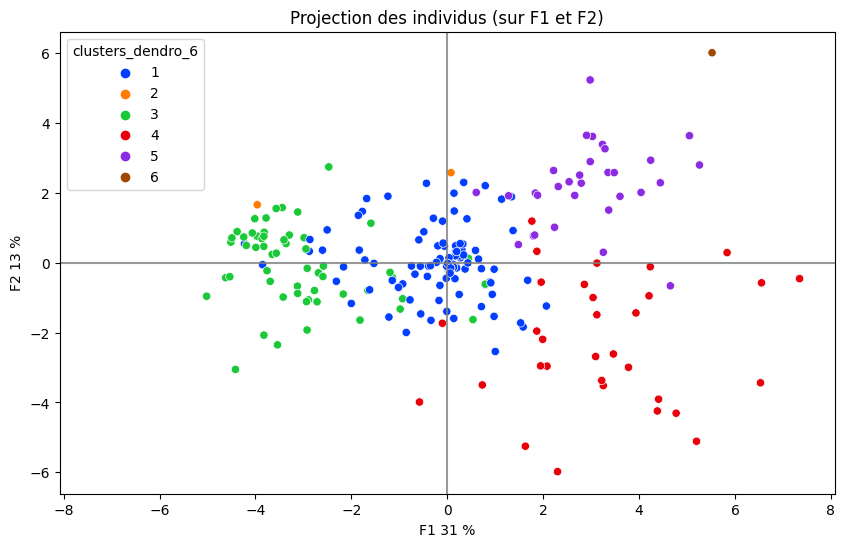

In [62]:
 #Projection des clusters obtenus par AHC (dendrogramme) sur le 1er plan factoriel
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(10,6), marker="o", markersize=24, clusters=data_volaille_scaled["clusters_dendro_6"])

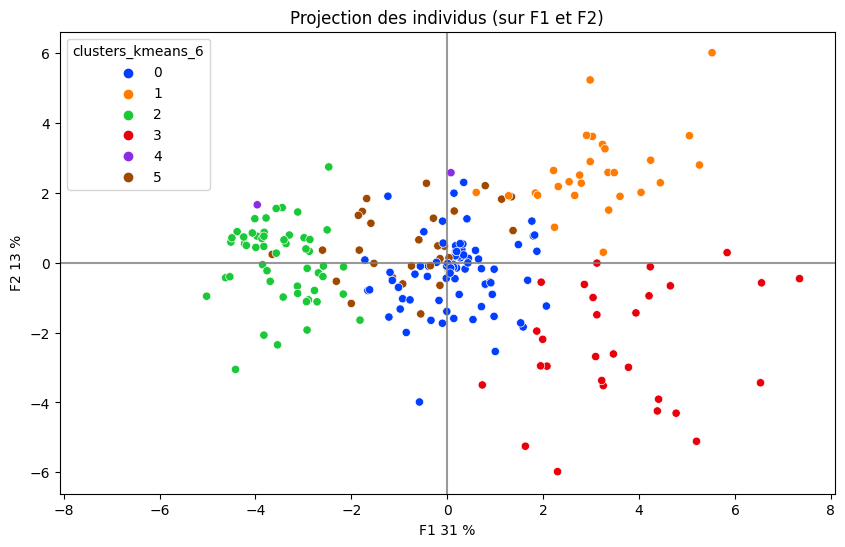

In [63]:
#Projection des clusters obtenus par k-means sur le 1er plan factoriel
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(10,6), marker="o", clusters=data_volaille_scaled["clusters_kmeans_6"])

Clusters sur 2ème plan factoriel

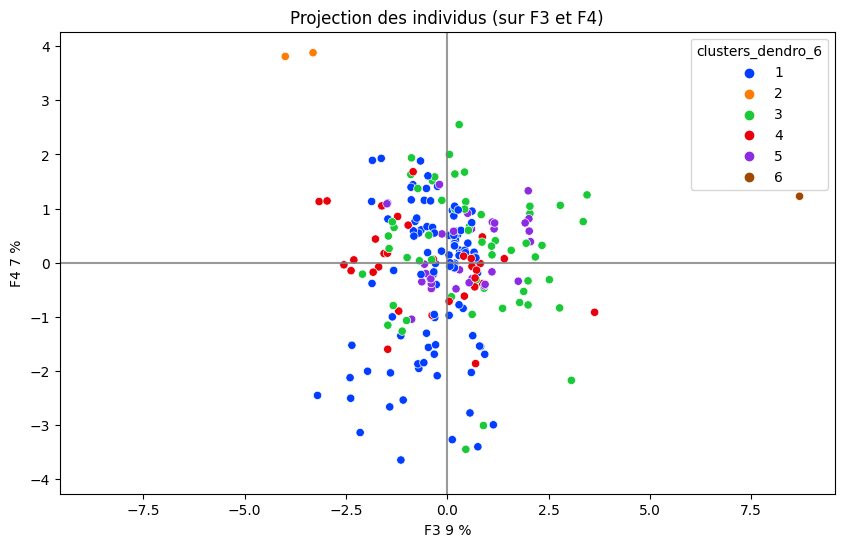

In [64]:
 #Projection des clusters obtenus par AHC (dendrogramme) sur le 2 plan factoriel
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, figsize=(10,6), marker="o", markersize=24, clusters=data_volaille_scaled["clusters_dendro_6"])

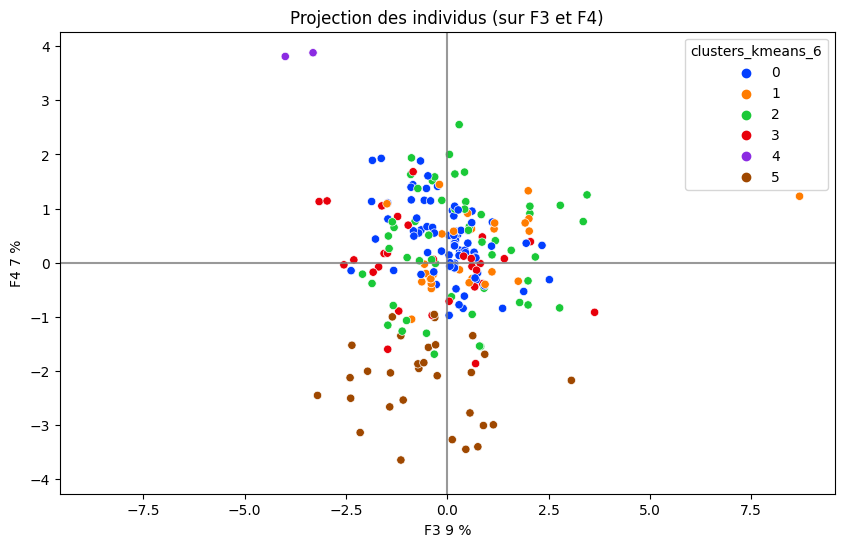

In [65]:
#Projection des clusters obtenus par k-means sur le 1er plan factoriel
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, figsize=(10,6), marker="o", clusters=data_volaille_scaled["clusters_kmeans_6"])

Croisement des pays

In [66]:
#Liste de pays pour chaque cluster
liste_dendro=data_volaille_scaled[data_volaille_scaled.clusters_dendro_6==5].index.tolist()
liste_dendro=liste_dendro+data_volaille_scaled[data_volaille_scaled.clusters_dendro_6==6].index.tolist()
display(liste_dendro)

['Allemagne',
 'Autriche',
 'Belgique',
 'Bermudes',
 'Chine - RAS de Macao',
 'Chypre',
 'Danemark',
 'Espagne',
 'Estonie',
 'Finlande',
 'France',
 'Hongrie',
 'Irlande',
 'Islande',
 'Italie',
 'Lettonie',
 'Lituanie',
 'Malte',
 'Norvège',
 'Pays-Bas',
 'Pologne',
 'Portugal',
 'Qatar',
 'Roumanie',
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
 'Singapour',
 'Slovaquie',
 'Slovénie',
 'Suède',
 'Suisse',
 'Tchéquie',
 'Luxembourg']

In [67]:
#la liste des pays pour chaque cluster
liste_kmeans= data_volaille_scaled[data_volaille_scaled.clusters_kmeans_6==1].index.tolist()
print('[%s]'%",   ".join(map(str, liste_kmeans)))

[Allemagne,   Autriche,   Belgique,   Danemark,   Espagne,   Estonie,   Finlande,   France,   Hongrie,   Irlande,   Islande,   Italie,   Lituanie,   Luxembourg,   Malte,   Norvège,   Pays-Bas,   Pologne,   Portugal,   Qatar,   Roumanie,   Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,   Singapour,   Slovaquie,   Slovénie,   Suède,   Suisse,   Tchéquie]


In [68]:
intersection= list(set(liste_dendro)&set(liste_kmeans))
intersection.sort(key=str.lower)
print('[%s]'%",   ".join(map(str, intersection)))

[Allemagne,   Autriche,   Belgique,   Danemark,   Espagne,   Estonie,   Finlande,   France,   Hongrie,   Irlande,   Islande,   Italie,   Lituanie,   Luxembourg,   Malte,   Norvège,   Pays-Bas,   Pologne,   Portugal,   Qatar,   Roumanie,   Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,   Singapour,   Slovaquie,   Slovénie,   Suisse,   Suède,   Tchéquie]
